In [1]:
from evaluation import Eval
import pandas as pd
import matplotlib.pyplot as plt
import ptitprince as pt
import seaborn as sns

In [2]:
graphdata_df = pd.read_csv('panacea_graphdata_results.csv')
graphdata_df

,Graph ID,Study ID,Random,Biocontext,Methods,Pagerank Threshold,Number of nodes,Number of edges,Connected targets,Perc missing targets,...,Mean degree centrality,Closeness centrality,Mean closeness centrality,Betweenness centrality,Mean betweenness centrality,offtarget_count,all_offtargets,perc_offtarget,perc_offtarget_nodes,perc_offtarget_edges
0,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,12819d,H1793_PONATINIB,"reachability, pagerank, reachability, allpaths",3.0,96,289,23,8.0,...,0.063377,"{'MAP4K1': 0.0, 'MAPK1': 0.1994335614821808, '...",0.171747,"{'MAP4K1': 0.0, 'MAPK1': 0.08696953159746851, ...",0.018323,8.0,31.0,25.806452,8.333333,2.768166
1,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,12819d,H1793_PONATINIB,"reachability, pagerank, shortest",10.0,62,77,25,0.0,...,0.040719,"{'MAP4K1': 0.0, 'MAPK1': 0.01639344262295082, ...",0.030963,"{'MAP4K1': 0.0, 'MAPK1': 0.012164541590771101,...",0.001274,4.0,31.0,12.903226,6.451613,5.194805
2,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,12819d,H1793_PONATINIB,"reachability, shortest",100.0,58,68,25,0.0,...,0.041137,"{'MAP4K1': 0.0, 'MAPK1': 0.017543859649122806,...",0.030754,"{'MAP4K1': 0.0, 'MAPK1': 0.013669590643274852,...",0.001264,3.0,31.0,9.677419,5.172414,4.411765
3,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,12819d,H1793_PONATINIB,"reachability, pagerank, shortest, sc",10.0,33,39,11,56.0,...,0.073864,"{'MAP4K1': 0.0, 'MAPK1': 0.03125, 'ETV3': 0.04...",0.053653,"{'MAP4K1': 0.0, 'MAPK1': 0.024361559139784942,...",0.004002,4.0,31.0,12.903226,12.121212,10.256410
4,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,12819d,H1793_PONATINIB,"reachability, shortest, sc",100.0,30,32,11,56.0,...,0.073563,"{'MAP4K1': 0.0, 'MAPK1': 0.034482758620689655,...",0.051814,"{'MAP4K1': 0.0, 'MAPK1': 0.02770935960591133, ...",0.003982,3.0,31.0,9.677419,10.000000,9.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197767,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,7bbde8,H1793_NILOTINIB,"reachability, shortest, sc",100.0,32,42,15,40.0,...,0.084677,"{'MAPK14': 0.0, 'MAPK3': 0.03225806451612903, ...",0.053361,"{'MAPK14': 0.0, 'MAPK3': 0.001075268817204301,...",0.001579,0.0,7.0,0.000000,0.000000,0.000000
197768,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,7bbde8,H1793_NILOTINIB,"reachability, pagerank, shortest",5.0,52,70,25,0.0,...,0.052790,"{'MAPK14': 0.0, 'EGFR': 0.0196078431372549, 'J...",0.033615,"{'MAPK14': 0.0, 'EGFR': 0.001176470588235294, ...",0.000649,0.0,7.0,0.000000,0.000000,0.000000
197769,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,7bbde8,H1793_NILOTINIB,"reachability, shortest",100.0,57,82,25,0.0,...,0.051378,"{'MAPK14': 0.0, 'EGFR': 0.017857142857142856, ...",0.033057,"{'MAPK14': 0.0, 'EGFR': 0.000974025974025974, ...",0.000592,0.0,7.0,0.000000,0.000000,0.000000
197770,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,7bbde8,H1793_NILOTINIB,"reachability, pagerank, reachability, allpaths",3.0,65,208,23,8.0,...,0.100000,"{'MAPK14': 0.0, 'PRKACA': 0.1985294117647059, ...",0.180997,"{'MAPK14': 0.0, 'PRKACA': 0.09696167685378994,...",0.020085,0.0,7.0,0.000000,0.000000,0.000000


In [3]:

# change the Random column so that it contains False when Random==real and True otherwise
graphdata_df['Random'] = graphdata_df['Random'].apply(lambda x: False if x=='real' else True)





In [4]:

def plot_raincloud_plots(graphdata_df, feature):
    # define 3x2 facetgrid, not 6x1

    g = sns.FacetGrid(graphdata_df, col = "Methods", height = 4, aspect = 16/9, col_wrap=3)
    g = g.map_dataframe(pt.RainCloud, x = "Random", y = feature, data = graphdata_df,
                    orient = "h")
    # add plot title
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(feature)
    return g


In [43]:
graphdata_df.columns
variables_to_plot = ['Number of nodes', 'Number of edges', 'Perc missing targets',
       'Mean degree centrality',
       'Mean closeness centrality',
       'Mean betweenness centrality', 'offtarget_count', 'all_offtargets',
       'perc_offtarget', 'perc_offtarget_nodes', 'perc_offtarget_edges']

Number of nodes
Number of edges
Perc missing targets
Mean degree centrality
Mean closeness centrality
Mean betweenness centrality
offtarget_count
all_offtargets
perc_offtarget
perc_offtarget_nodes
perc_offtarget_edges


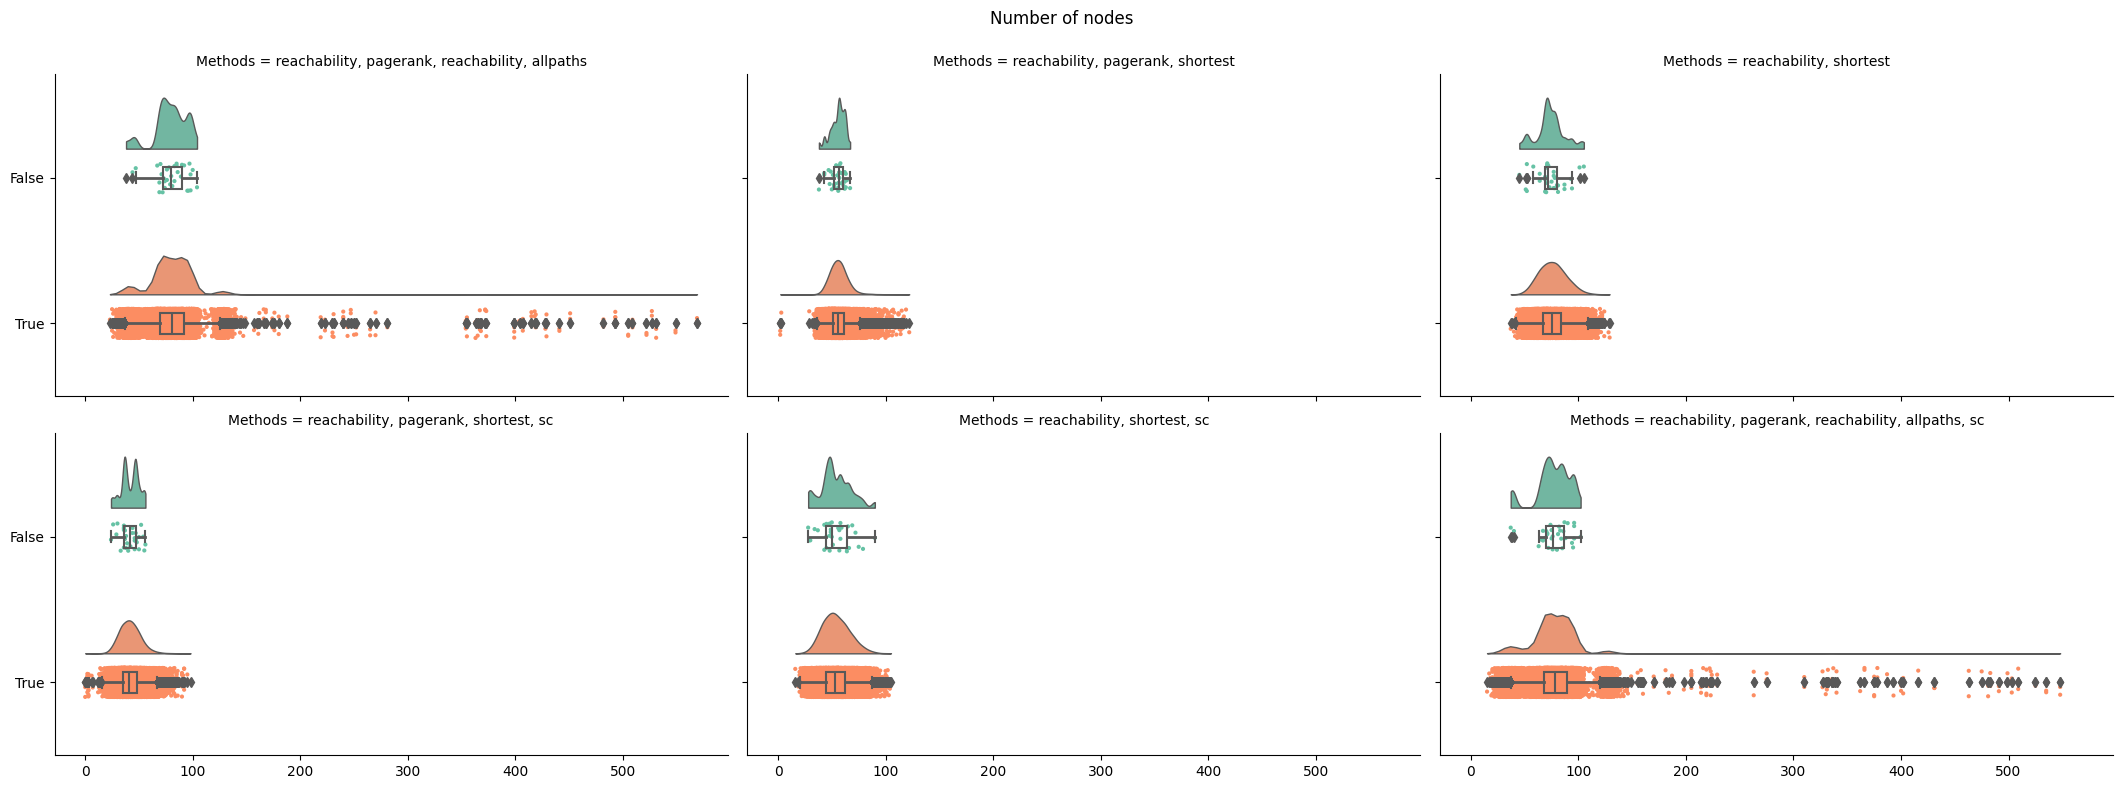

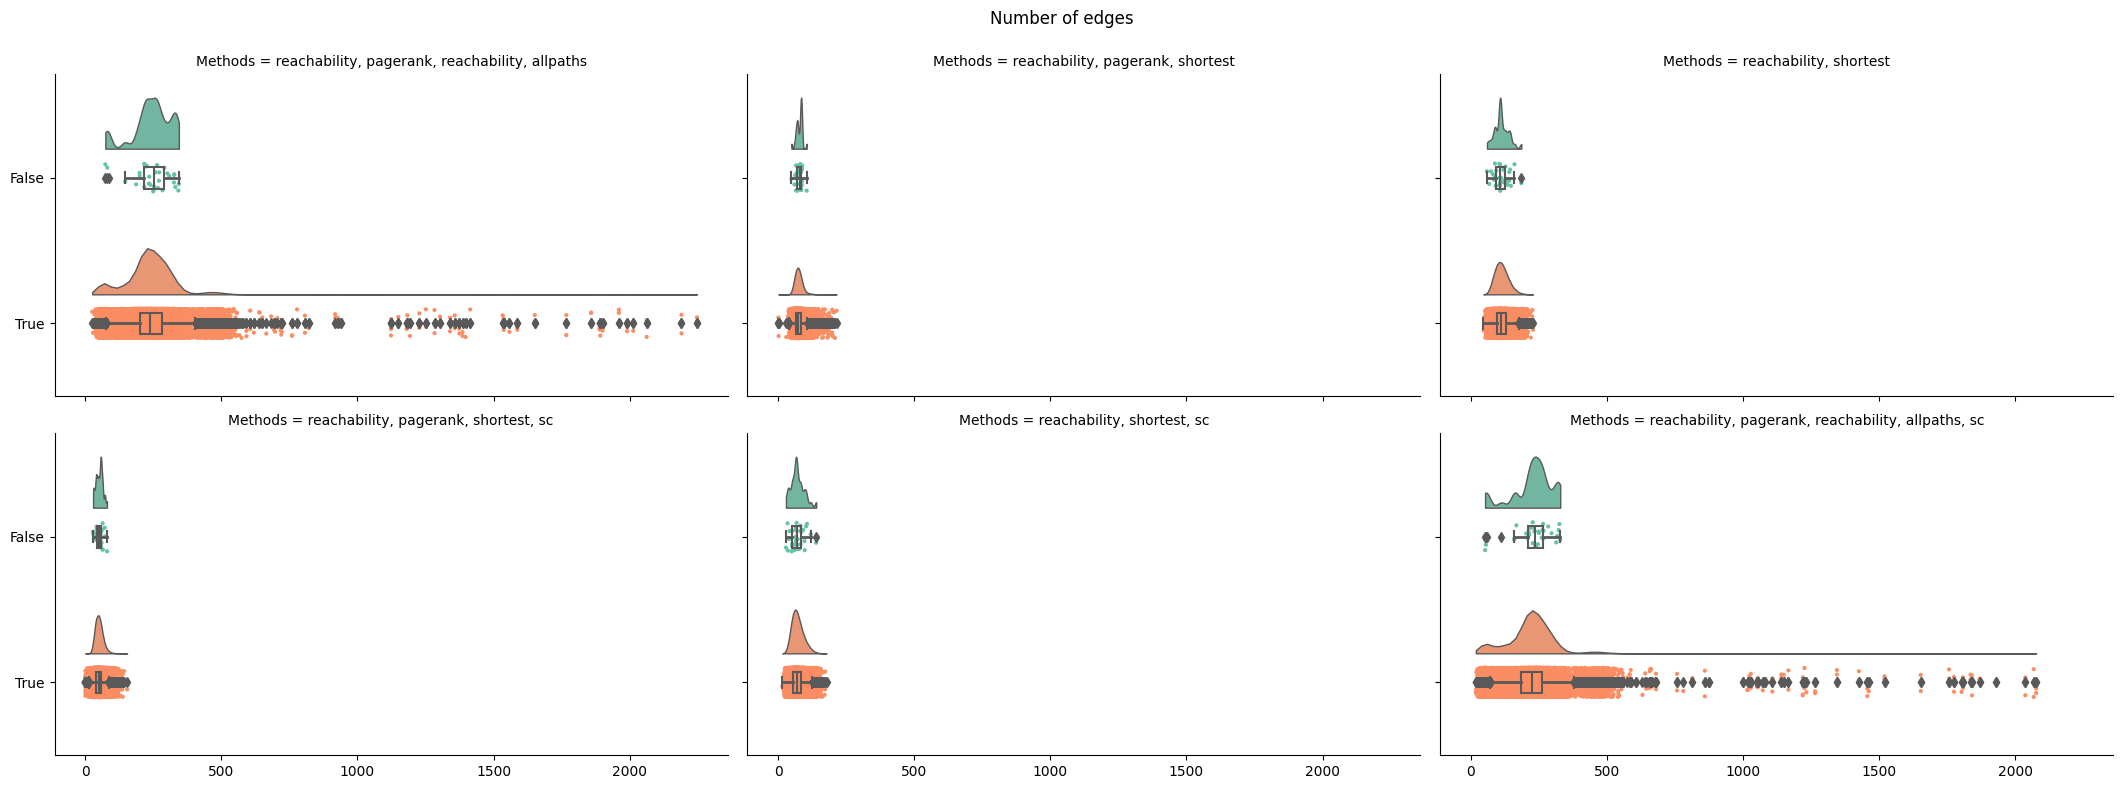

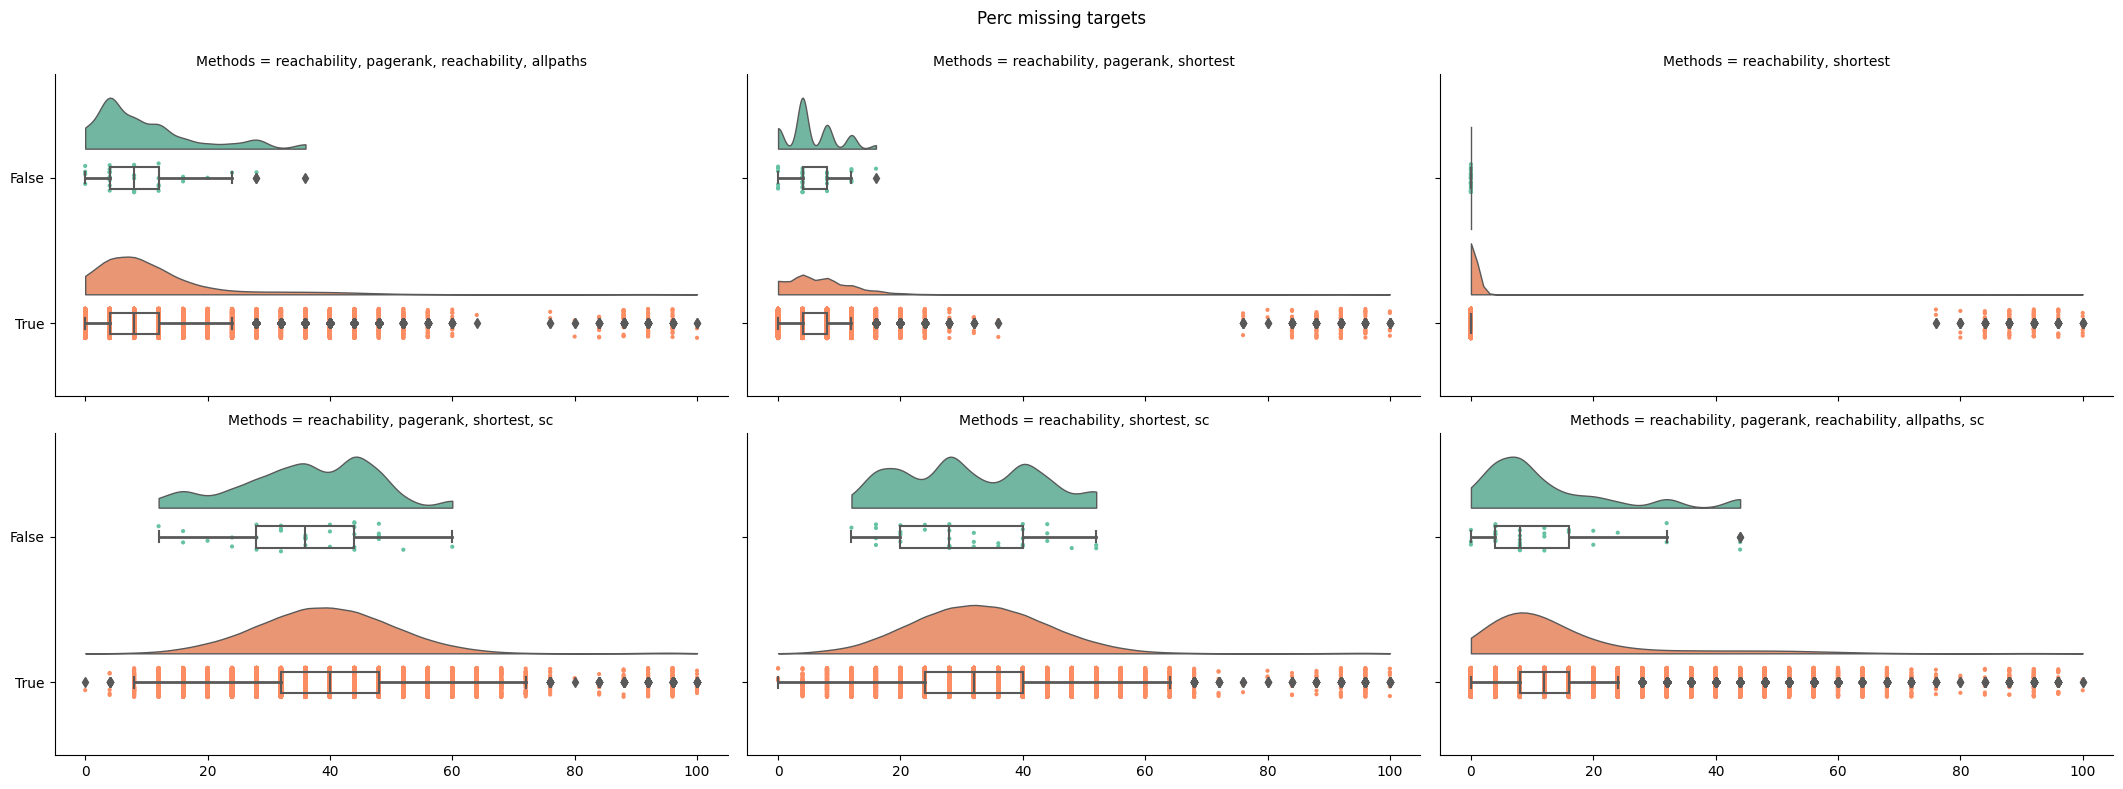

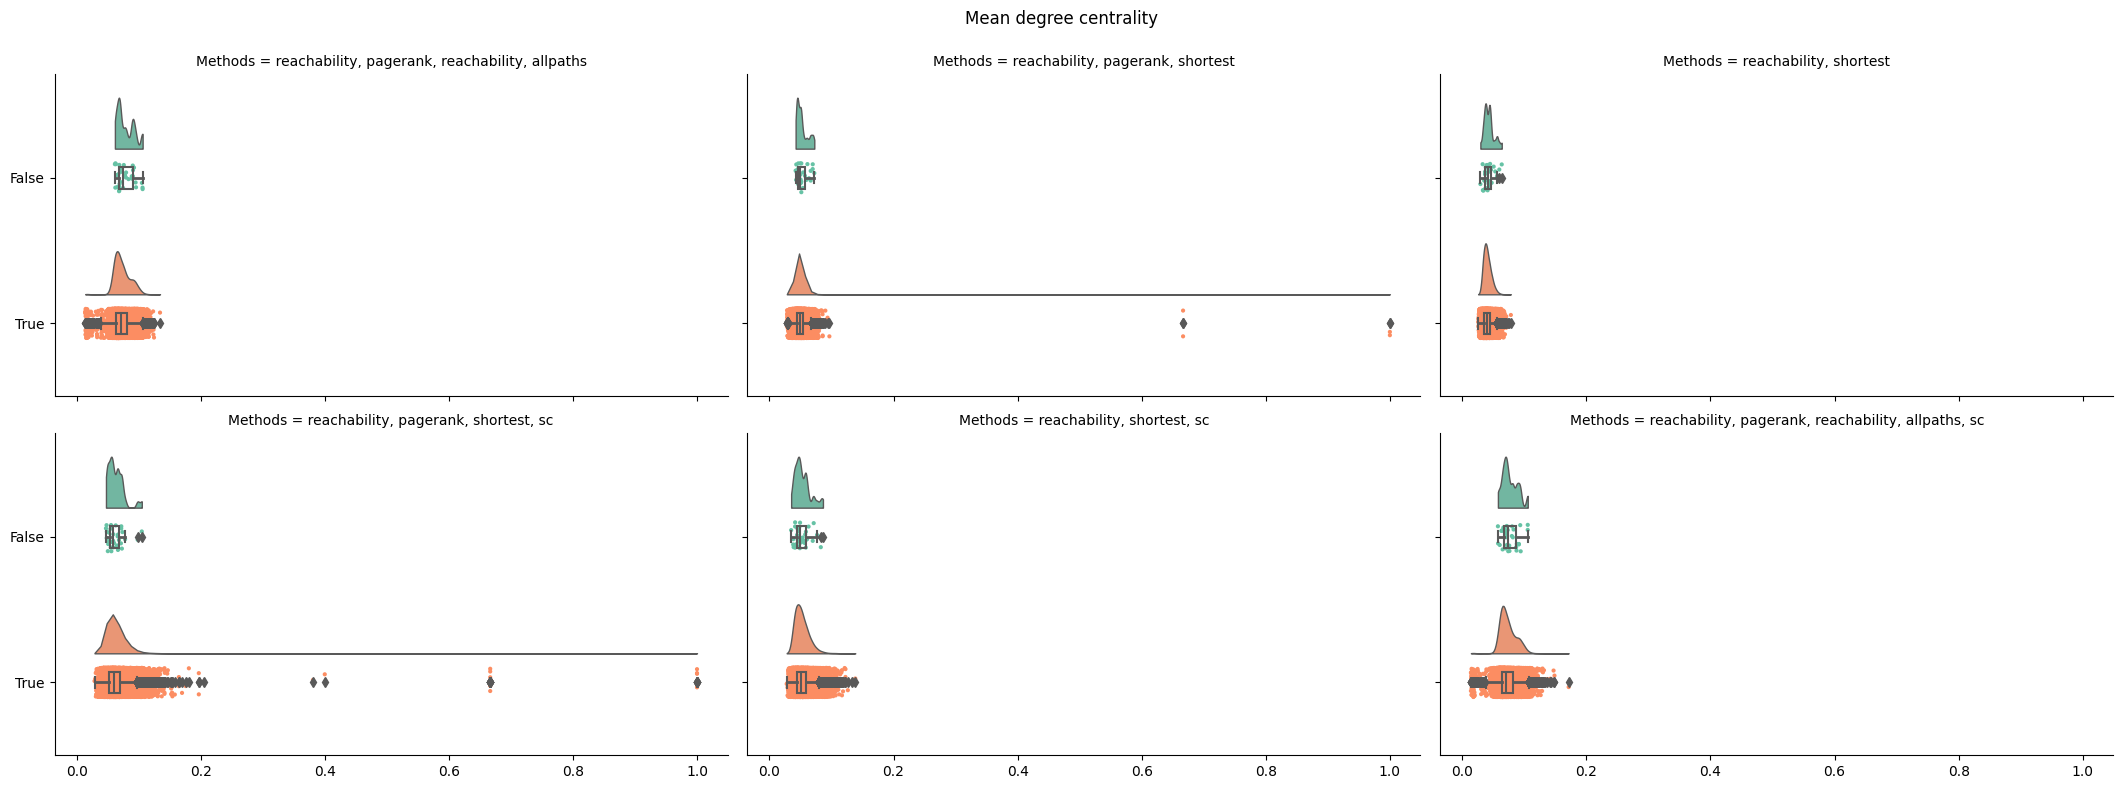

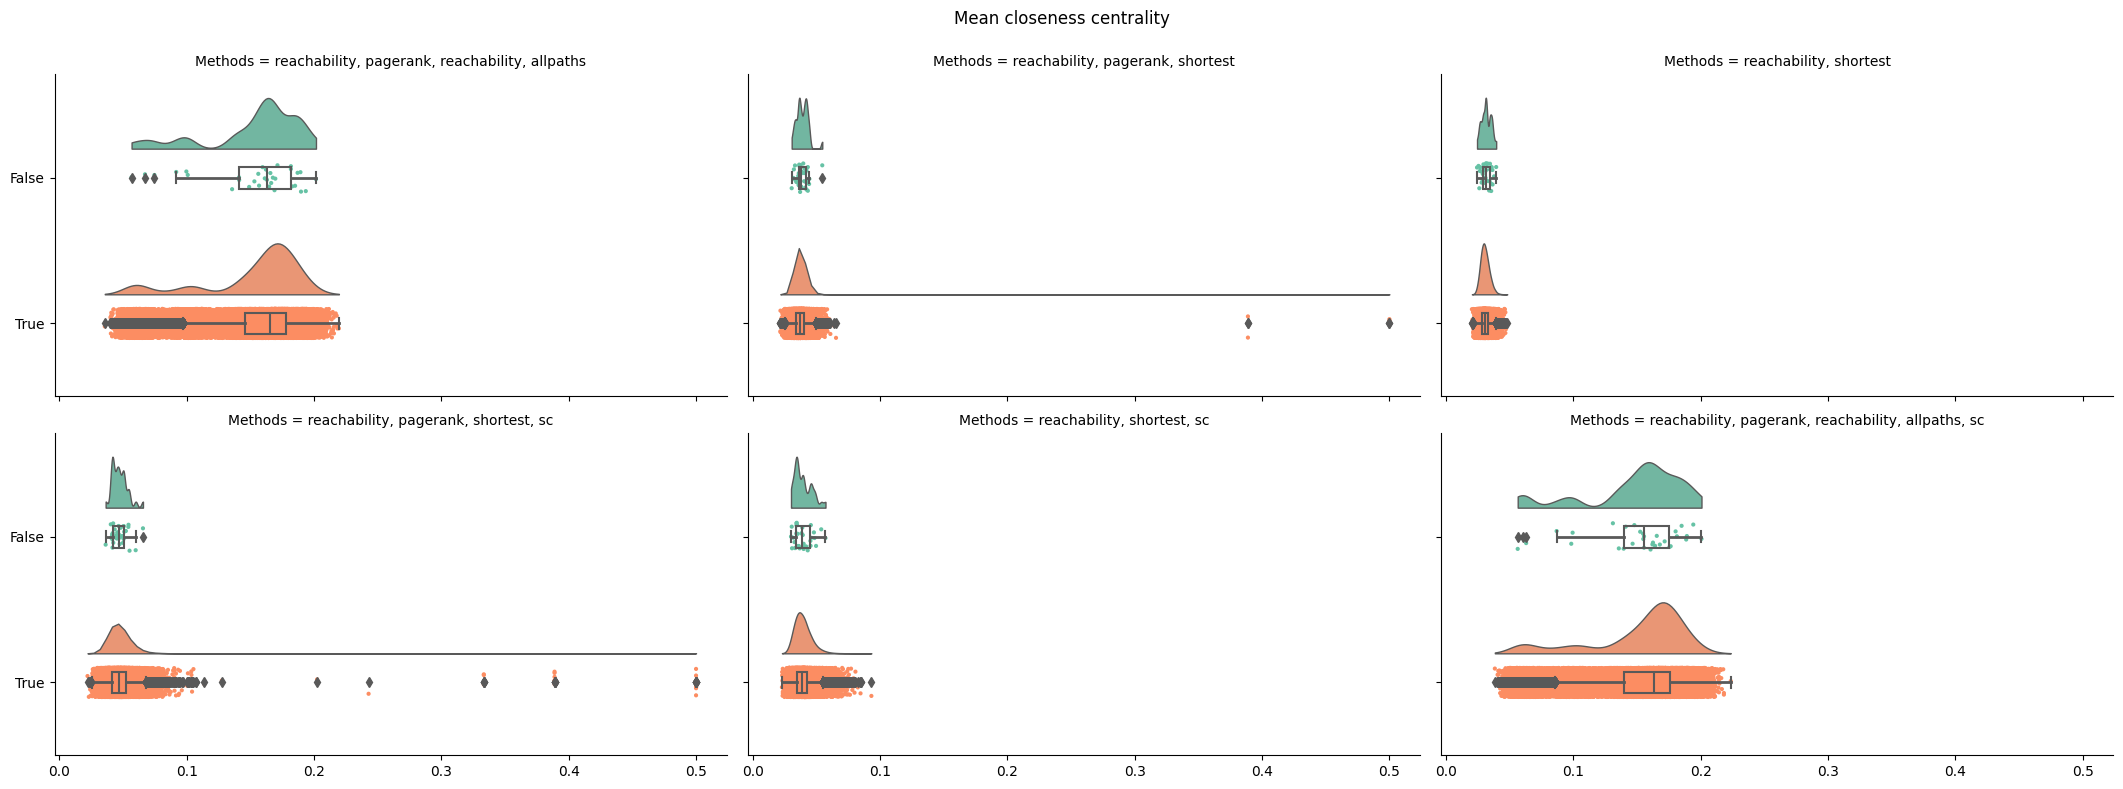

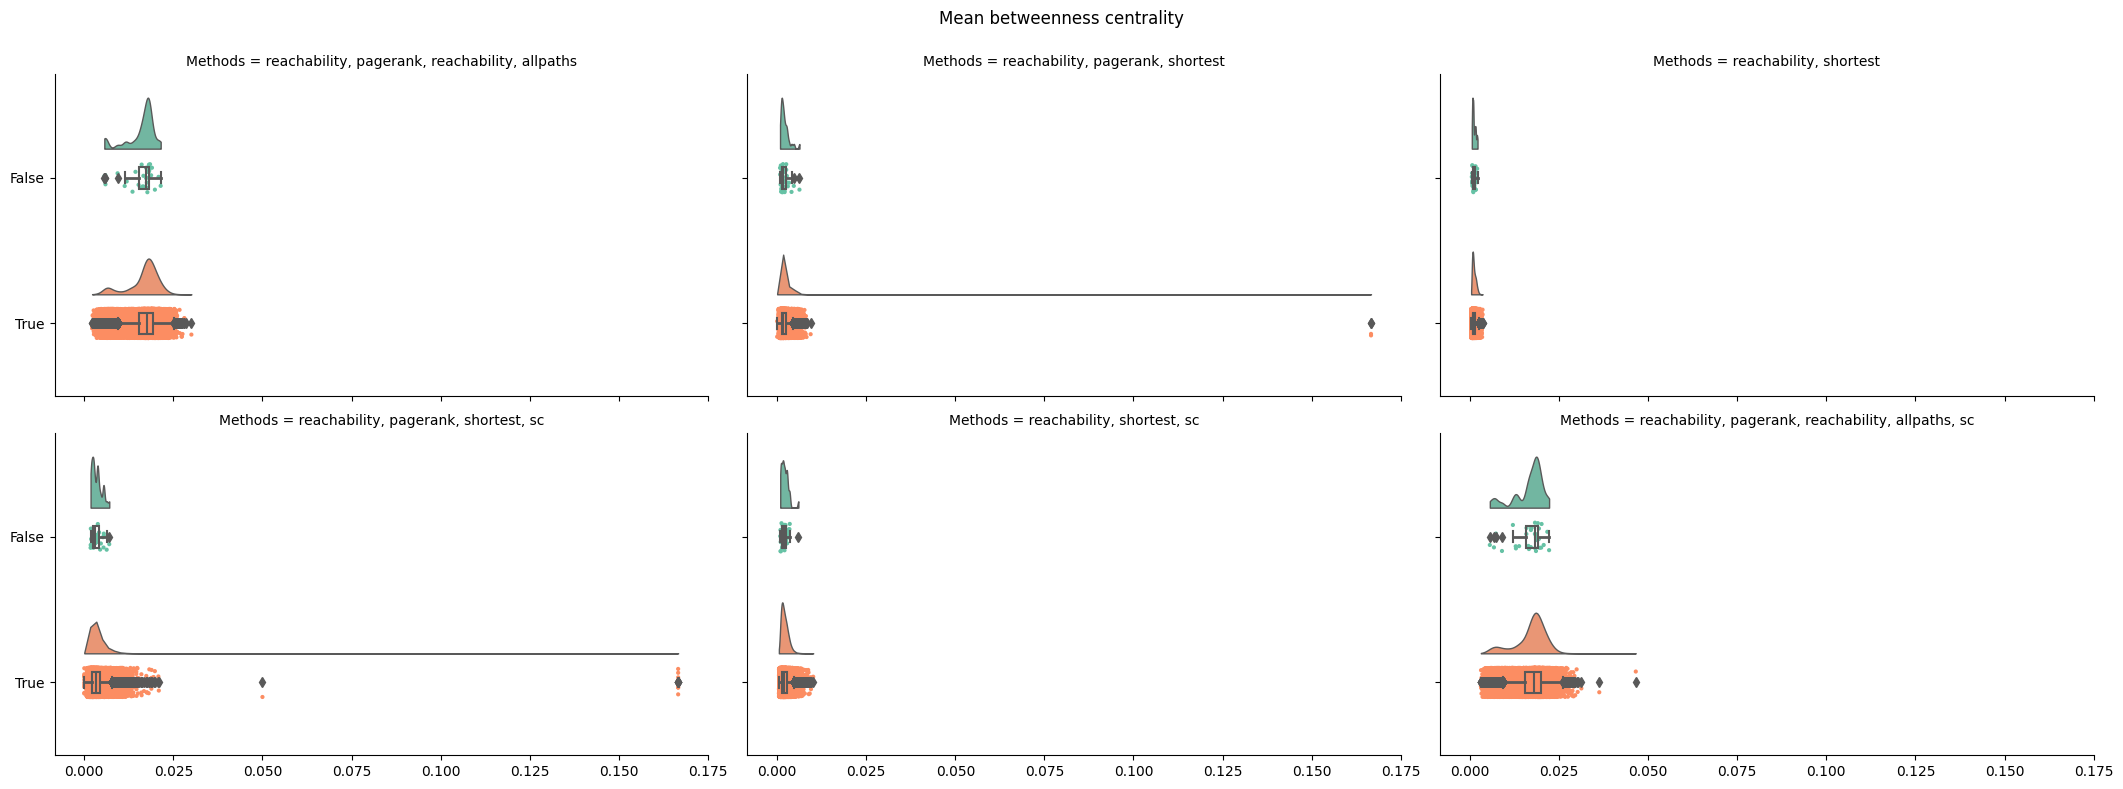

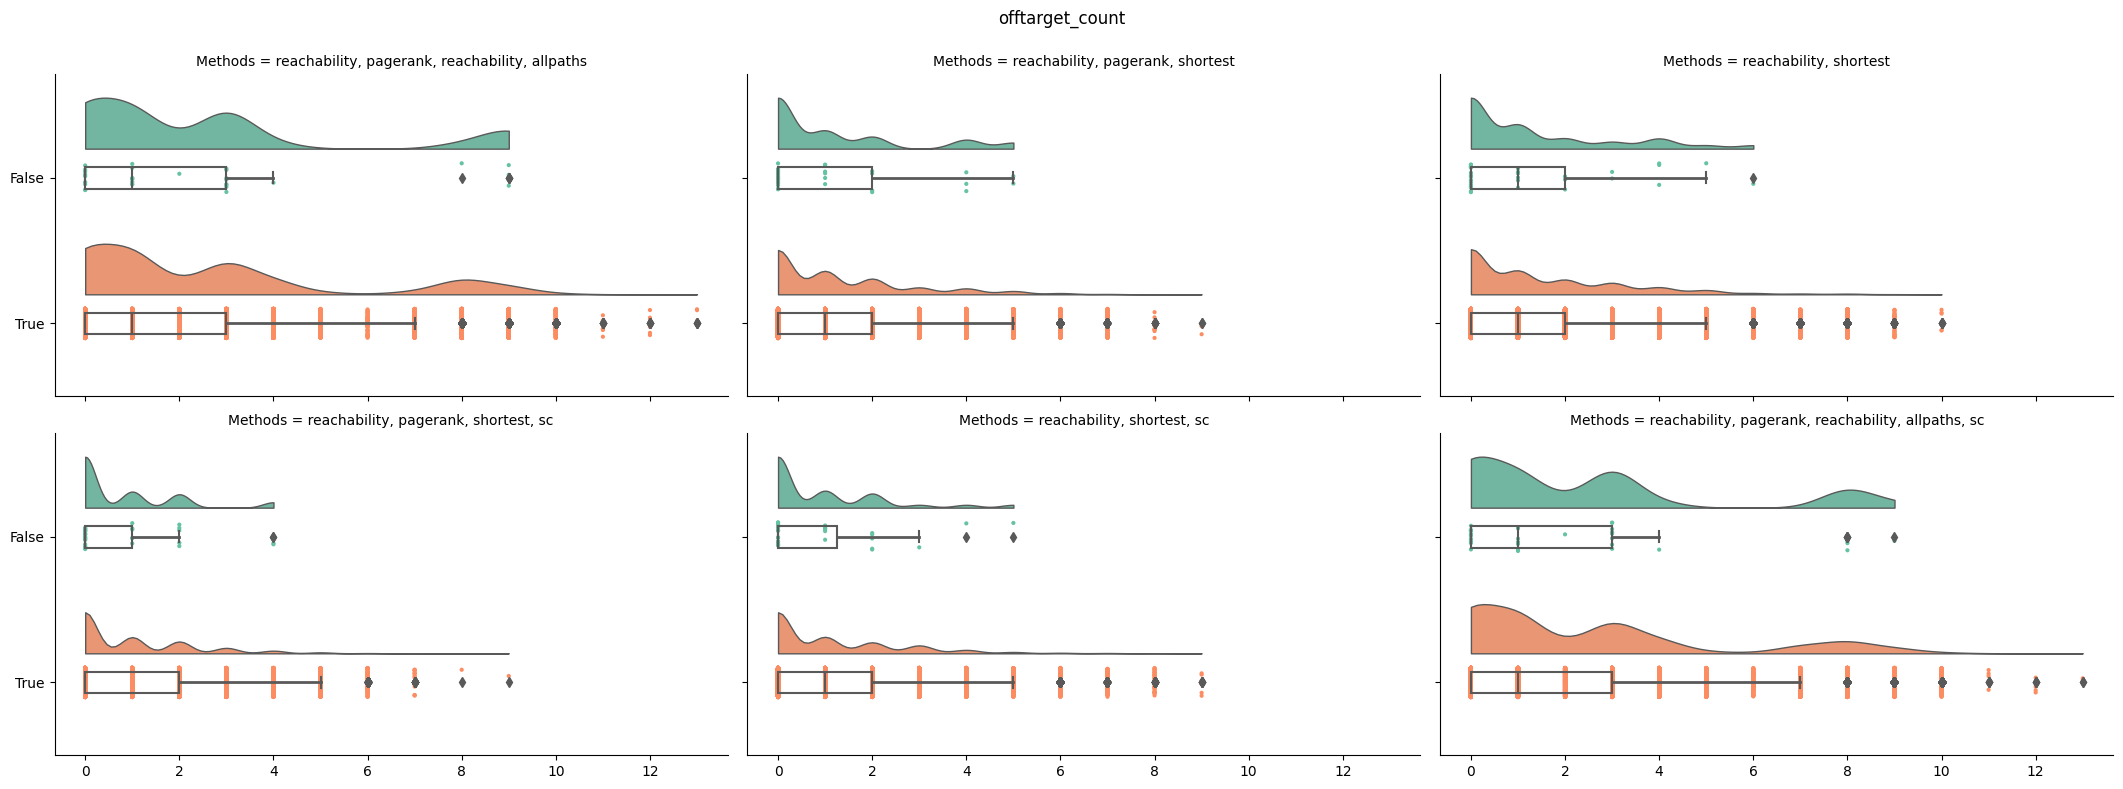

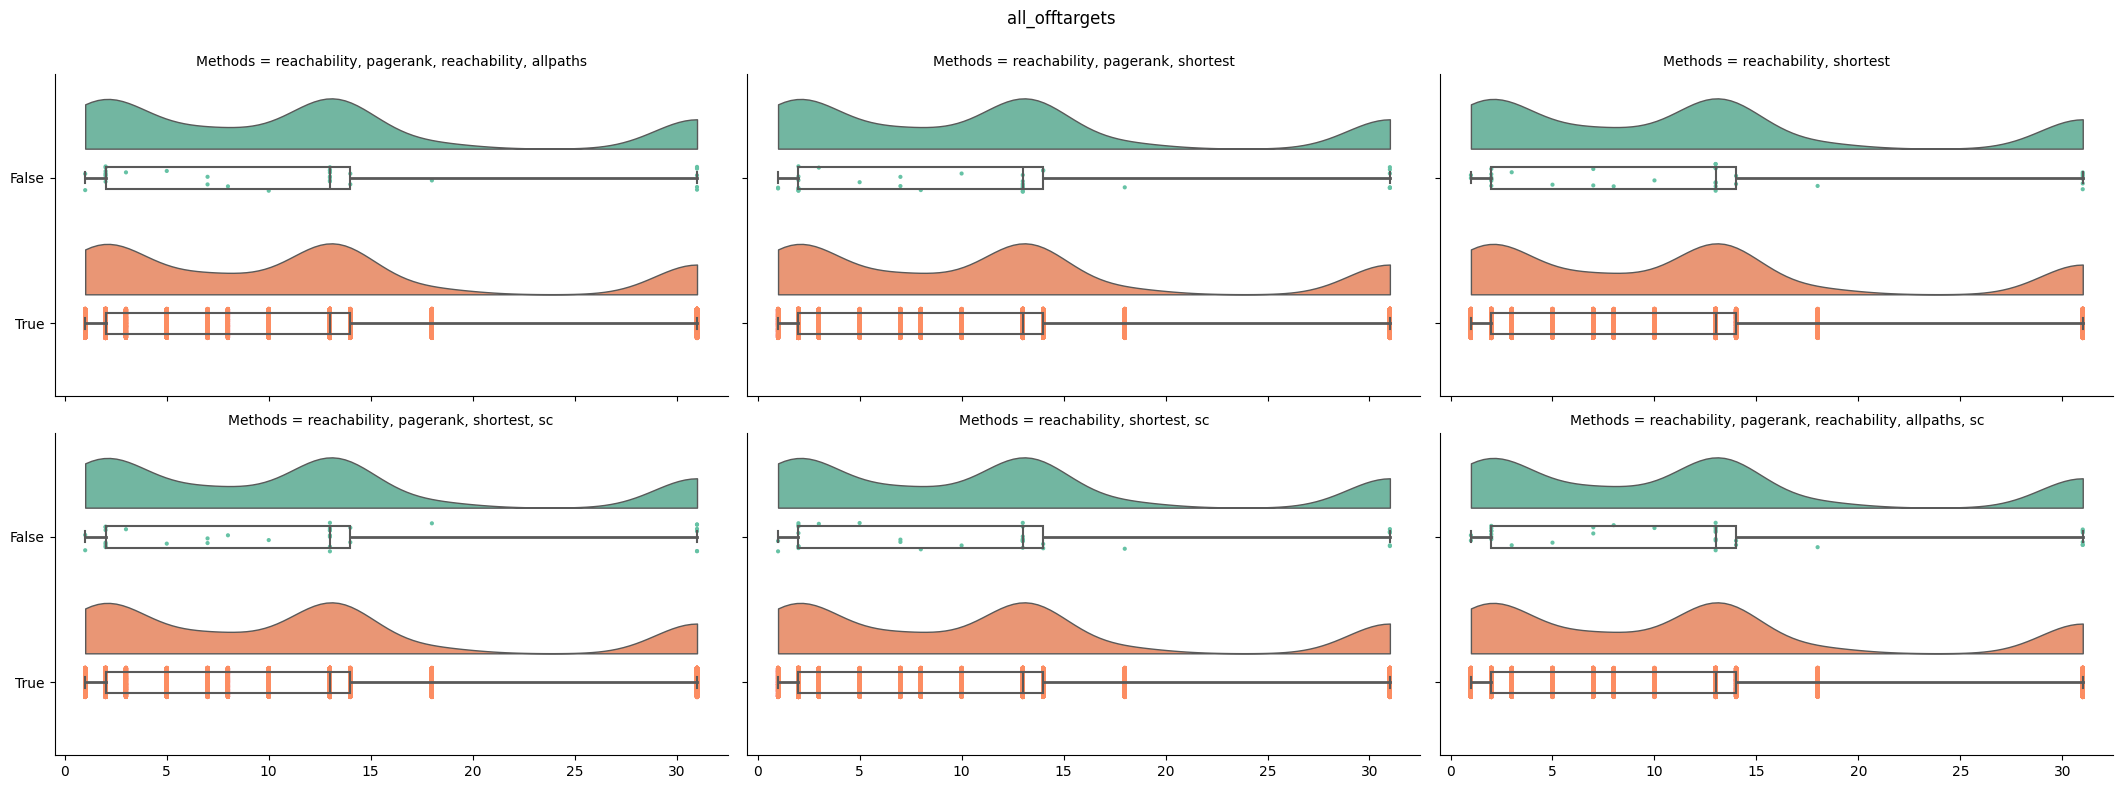

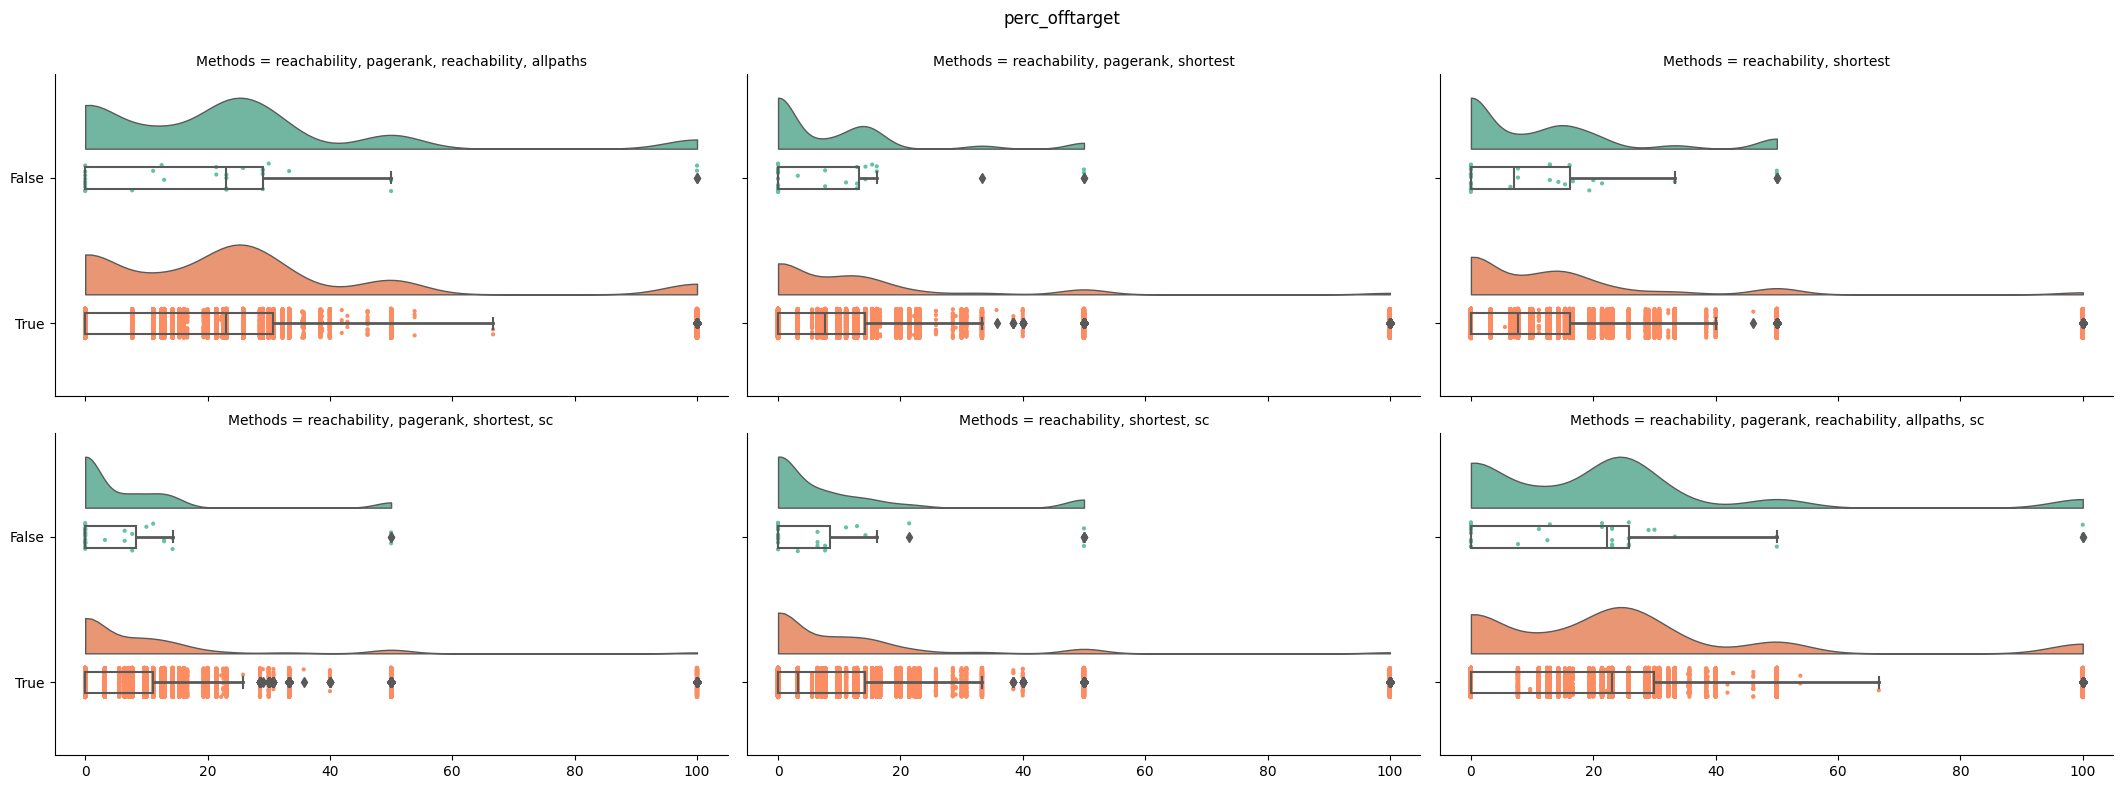

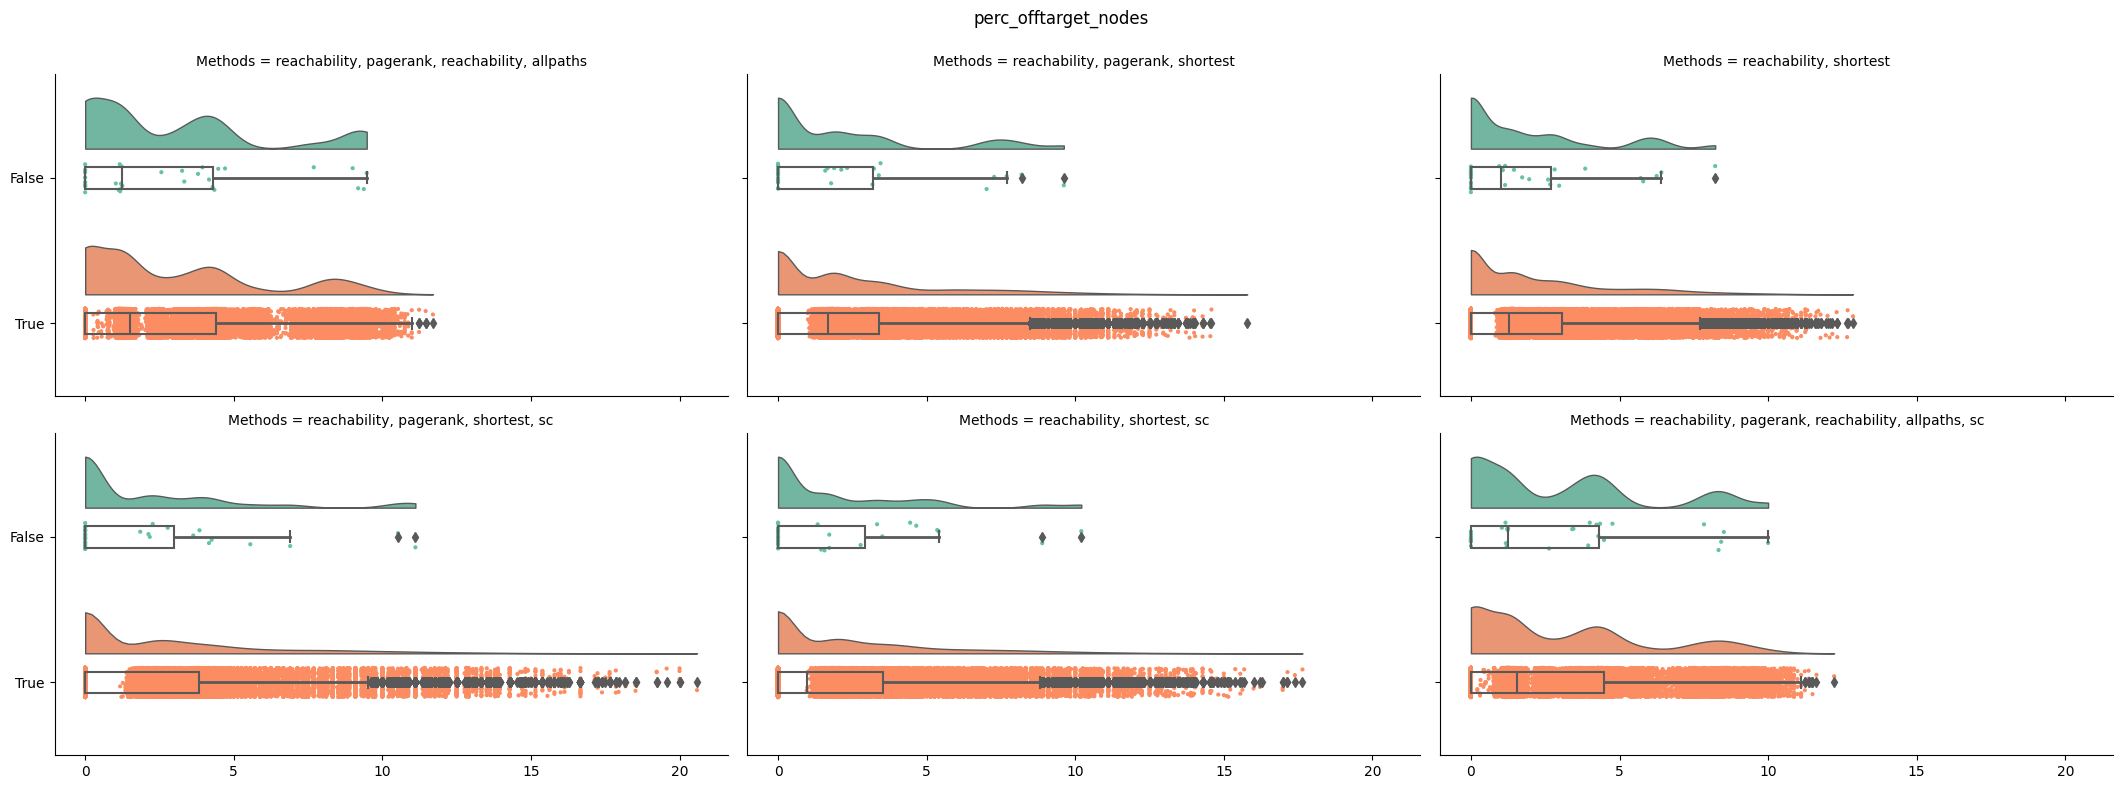

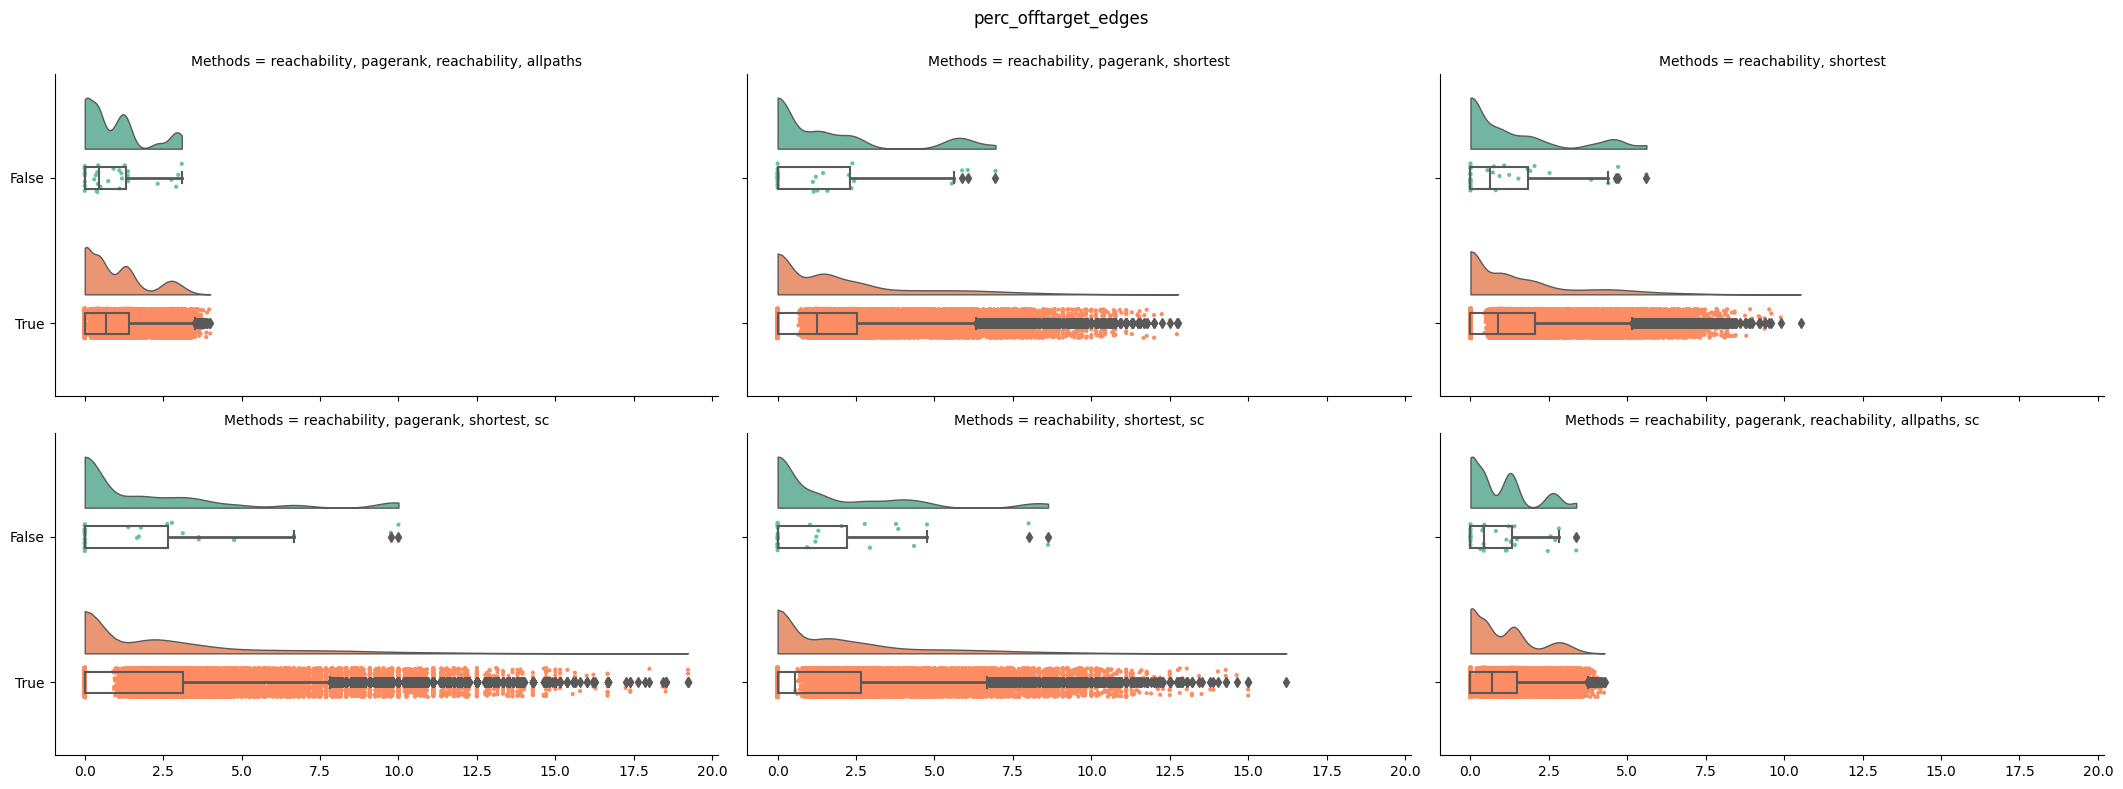

In [9]:
for feature in variables_to_plot:
    print(feature)
    plot_raincloud_plots(graphdata_df, feature)

In [10]:
panacea_de = pd.read_csv('panacea_de.tsv', sep='\t')

In [11]:
panacea_de

,gene_symbol,cell_line,treatment,logFC,padj,stat
0,A1BG,ASPC,AFATINIB,NaN,NaN,NaN
1,A1BG,H1793,AFATINIB,NaN,NaN,NaN
2,A1BG-AS1,ASPC,AFATINIB,NaN,NaN,NaN
3,A1BG-AS1,H1793,AFATINIB,NaN,NaN,NaN
4,A1CF,ASPC,AFATINIB,-0.344588,0.728672,-0.796610
...,...,...,...,...,...,...
1173162,ZYG11A,U87,VARLITINIB,NaN,NaN,NaN
1173163,ZYG11B,U87,VARLITINIB,-0.412397,0.598484,-1.126155
1173164,ZYX,U87,VARLITINIB,0.633512,0.219150,2.245535
1173165,ZZEF1,U87,VARLITINIB,0.733776,NaN,1.013150


In [12]:
# get unique cell line-treatment row combinations
panacea_de['cell_line-treatment'] = panacea_de['cell_line'] + '-' + panacea_de['treatment']
panacea_de['cell_line-treatment'].unique()

array(['ASPC-AFATINIB', 'H1793-AFATINIB', 'ASPC-AZD5363',
       'LNCAP-BAFETINIB', 'H1793-BAFETINIB', 'EFO21-BAFETINIB',
       'HF2597-BAFETINIB', 'PANC1-BAFETINIB', 'KRJ1-BOSUTINIB',
       'H1793-BOSUTINIB', 'H1793-CABOZANTINIB', 'H1793-CRIZOTINIB',
       'KRJ1-DASATINIB', 'H1793-DASATINIB', 'ASPC-DOVITINIB',
       'LNCAP-DOVITINIB', 'LNCAP-FORETINIB', 'H1793-GEFITINIB',
       'ASPC-ICOTINIB', 'KRJ1-ICOTINIB', 'H1793-IMATINIB', 'LNCAP-KW2449',
       'H1793-KW2449', 'ASPC-KW2449', 'HSTS-LAPATINIB', 'H1793-MGCD265',
       'ASPC-MK2206', 'H1793-MK2206', 'KRJ1-NILOTINIB', 'H1793-NILOTINIB',
       'LNCAP-OSIMERTINIB', 'H1793-OSIMERTINIB', 'LNCAP-PONATINIB',
       'H1793-PONATINIB', 'HCC1143-PONATINIB', 'KRJ1-PONATINIB',
       'EFO21-PONATINIB', 'U87-QUIZARTINIB', 'H1793-REGORAFENIB',
       'HF2597-REGORAFENIB', 'H1793-SORAFENIB', 'LNCAP-SORAFENIB',
       'H1793-SUNITINIB', 'KRJ1-VANDETANIB', 'HCC1143-VANDETANIB',
       'H1793-VANDETANIB', 'U87-VARLITINIB'], dtype=object)

In [5]:
graphdata_df


,Graph ID,Study ID,Random,Biocontext,Methods,Pagerank Threshold,Number of nodes,Number of edges,Connected targets,Perc missing targets,...,Mean degree centrality,Closeness centrality,Mean closeness centrality,Betweenness centrality,Mean betweenness centrality,offtarget_count,all_offtargets,perc_offtarget,perc_offtarget_nodes,perc_offtarget_edges
0,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,True,H1793_PONATINIB,"reachability, pagerank, reachability, allpaths",3.0,96,289,23,8.0,...,0.063377,"{'MAP4K1': 0.0, 'MAPK1': 0.1994335614821808, '...",0.171747,"{'MAP4K1': 0.0, 'MAPK1': 0.08696953159746851, ...",0.018323,8.0,31.0,25.806452,8.333333,2.768166
1,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,True,H1793_PONATINIB,"reachability, pagerank, shortest",10.0,62,77,25,0.0,...,0.040719,"{'MAP4K1': 0.0, 'MAPK1': 0.01639344262295082, ...",0.030963,"{'MAP4K1': 0.0, 'MAPK1': 0.012164541590771101,...",0.001274,4.0,31.0,12.903226,6.451613,5.194805
2,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,True,H1793_PONATINIB,"reachability, shortest",100.0,58,68,25,0.0,...,0.041137,"{'MAP4K1': 0.0, 'MAPK1': 0.017543859649122806,...",0.030754,"{'MAP4K1': 0.0, 'MAPK1': 0.013669590643274852,...",0.001264,3.0,31.0,9.677419,5.172414,4.411765
3,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,True,H1793_PONATINIB,"reachability, pagerank, shortest, sc",10.0,33,39,11,56.0,...,0.073864,"{'MAP4K1': 0.0, 'MAPK1': 0.03125, 'ETV3': 0.04...",0.053653,"{'MAP4K1': 0.0, 'MAPK1': 0.024361559139784942,...",0.004002,4.0,31.0,12.903226,12.121212,10.256410
4,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,True,H1793_PONATINIB,"reachability, shortest, sc",100.0,30,32,11,56.0,...,0.073563,"{'MAP4K1': 0.0, 'MAPK1': 0.034482758620689655,...",0.051814,"{'MAP4K1': 0.0, 'MAPK1': 0.02770935960591133, ...",0.003982,3.0,31.0,9.677419,10.000000,9.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197767,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,True,H1793_NILOTINIB,"reachability, shortest, sc",100.0,32,42,15,40.0,...,0.084677,"{'MAPK14': 0.0, 'MAPK3': 0.03225806451612903, ...",0.053361,"{'MAPK14': 0.0, 'MAPK3': 0.001075268817204301,...",0.001579,0.0,7.0,0.000000,0.000000,0.000000
197768,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,True,H1793_NILOTINIB,"reachability, pagerank, shortest",5.0,52,70,25,0.0,...,0.052790,"{'MAPK14': 0.0, 'EGFR': 0.0196078431372549, 'J...",0.033615,"{'MAPK14': 0.0, 'EGFR': 0.001176470588235294, ...",0.000649,0.0,7.0,0.000000,0.000000,0.000000
197769,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,True,H1793_NILOTINIB,"reachability, shortest",100.0,57,82,25,0.0,...,0.051378,"{'MAPK14': 0.0, 'EGFR': 0.017857142857142856, ...",0.033057,"{'MAPK14': 0.0, 'EGFR': 0.000974025974025974, ...",0.000592,0.0,7.0,0.000000,0.000000,0.000000
197770,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,True,H1793_NILOTINIB,"reachability, pagerank, reachability, allpaths",3.0,65,208,23,8.0,...,0.100000,"{'MAPK14': 0.0, 'PRKACA': 0.1985294117647059, ...",0.180997,"{'MAPK14': 0.0, 'PRKACA': 0.09696167685378994,...",0.020085,0.0,7.0,0.000000,0.000000,0.000000


In [12]:
graphdata_df['Graph ID'][1]

'PANACEA__12819d__H1793_PONATINIB__reachability__pagerank_10__shortest'

In [4]:
# compute the average values for all columns averaging between all random replicates, per network config
graphdata_df_avg = graphdata_df[graphdata_df['Random'] == True].groupby(['Study ID', 'Biocontext', 'Methods']).mean().reset_index()
# create column Graph ID by concatenating Study ID, random, Biocontext and Methods separated by __. In methods, replace , with __

graphdata_df_avg['Graph ID'] = graphdata_df_avg['Study ID'] + '__' + 'random' + '__' + graphdata_df_avg['Biocontext'] + '__' + graphdata_df_avg['Methods'].replace(', ', '__', regex=True)
graphdata_df_avg['Random'] = True
graphdata_df_real = graphdata_df[graphdata_df['Random'] == False].drop(columns=['cell_line', 'drug', 'Degree centrality',	'Closeness centrality',	'Betweenness centrality'])
graphdata_df_collapsed = pd.concat([graphdata_df_avg, graphdata_df_real])


/tmp/ipykernel_328/1996435788.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graphdata_df_avg = graphdata_df[graphdata_df['Random'] == True].groupby(['Study ID', 'Biocontext', 'Methods']).mean().reset_index()


In [5]:
import numpy as np

In [6]:
graphdata_df_collapsed.drop(columns='Graph ID', inplace=True)


In [7]:
graphdata_df_collapsed

,Study ID,Biocontext,Methods,Random,Pagerank Threshold,Number of nodes,Number of edges,Connected targets,Perc missing targets,Mean degree centrality,Mean closeness centrality,Mean betweenness centrality,offtarget_count,all_offtargets,perc_offtarget,perc_offtarget_nodes,perc_offtarget_edges
0,PANACEA,ASPC_AFATINIB,"reachability, pagerank, reachability, allpaths",True,3.016,82.358,233.410,22.655,9.380,0.069753,0.160363,0.016434,1.000,1.0,100.000000,1.220917,0.435943
1,PANACEA,ASPC_AFATINIB,"reachability, pagerank, reachability, allpaths...",True,3.014,80.720,223.221,22.300,10.800,0.069415,0.159762,0.016727,0.997,1.0,99.700000,1.241096,0.454013
2,PANACEA,ASPC_AFATINIB,"reachability, pagerank, shortest",True,3.072,57.405,72.887,23.143,7.428,0.045302,0.035058,0.001768,0.264,1.0,26.400000,0.457699,0.363454
3,PANACEA,ASPC_AFATINIB,"reachability, pagerank, shortest, sc",True,3.203,43.928,50.096,15.995,36.020,0.054094,0.042012,0.002902,0.159,1.0,15.900000,0.363174,0.322740
4,PANACEA,ASPC_AFATINIB,"reachability, shortest",True,100.000,80.679,114.101,24.912,0.352,0.035766,0.028285,0.000929,0.267,1.0,26.700000,0.317166,0.221772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177823,PANACEA,EFO21_BAFETINIB,"reachability, shortest",False,100.000,45.000,59.000,25.000,0.000,0.059596,0.035439,0.000576,0.000,13.0,0.000000,0.000000,0.000000
177824,PANACEA,EFO21_BAFETINIB,"reachability, pagerank, reachability, allpaths",False,3.000,72.000,272.000,24.000,4.000,0.106416,0.189778,0.016376,3.000,13.0,23.076923,4.166667,1.102941
177825,PANACEA,EFO21_BAFETINIB,"reachability, pagerank, shortest, sc",False,3.000,24.000,29.000,13.000,48.000,0.105072,0.065682,0.002717,0.000,13.0,0.000000,0.000000,0.000000
177826,PANACEA,EFO21_BAFETINIB,"reachability, shortest, sc",False,100.000,29.000,35.000,14.000,44.000,0.086207,0.053813,0.001779,0.000,13.0,0.000000,0.000000,0.000000


In [8]:
# collapse the graphdata_df_collapsed by computing the division between the random and its corresponding real network, per method and biological context, for all columns. When 0/0, replace with 1

graphdata_df_collapsed_log = graphdata_df_collapsed.groupby(['Study ID', 'Methods', 'Biocontext']).apply(lambda x: (x.iloc[1] + 1) / (x.iloc[0] + 1)).reset_index()
graphdata_df_collapsed_log


,Study ID,Methods,Biocontext,Random,Pagerank Threshold,Number of nodes,Number of edges,Connected targets,Perc missing targets,Mean degree centrality,Mean closeness centrality,Mean betweenness centrality,offtarget_count,all_offtargets,perc_offtarget,perc_offtarget_nodes,perc_offtarget_edges
0,PANACEA,"reachability, pagerank, reachability, allpaths",ASPC_AFATINIB,0.5,0.996016,1.043691,1.070773,1.099133,0.096339,0.998735,1.003797,0.998818,1.000000,1.0,1.000000,0.973828,0.974969
1,PANACEA,"reachability, pagerank, reachability, allpaths",ASPC_KW2449,0.5,0.966554,0.984076,1.093741,1.058701,0.474175,1.008612,1.008485,0.999490,0.872266,1.0,0.470266,0.847631,0.940700
2,PANACEA,"reachability, pagerank, reachability, allpaths",ASPC_MK2206,0.5,1.000000,1.023963,1.062769,0.951974,1.555263,1.000816,0.988413,0.997739,0.919392,1.0,0.853306,0.901482,0.933536
3,PANACEA,"reachability, pagerank, reachability, allpaths",EFO21_BAFETINIB,0.5,0.874178,0.894962,1.017724,1.029576,0.635113,1.017638,1.008630,0.997645,0.946819,1.0,0.933027,0.979299,0.900199
4,PANACEA,"reachability, pagerank, reachability, allpaths",EFO21_PONATINIB,0.5,0.927873,0.982677,1.061730,0.996377,1.040348,1.004823,1.000373,0.999908,1.080759,1.0,1.087266,1.077170,0.996828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,PANACEA,"reachability, shortest, sc",LNCAP_KW2449,0.5,1.000000,1.148497,1.116768,1.115537,0.786518,0.990057,0.995964,1.000015,1.000000,1.0,1.000000,1.000000,1.000000
194,PANACEA,"reachability, shortest, sc",LNCAP_OSIMERTINIB,0.5,1.000000,0.851716,0.904207,0.945068,1.099785,1.010751,1.004916,1.000043,0.825083,1.0,0.086207,0.742584,0.792195
195,PANACEA,"reachability, shortest, sc",LNCAP_PONATINIB,0.5,1.000000,0.979883,0.967267,1.063098,0.915207,0.998645,0.999291,0.999917,0.696516,1.0,0.638624,0.663990,0.673381
196,PANACEA,"reachability, shortest, sc",PANC1_BAFETINIB,0.5,1.000000,0.745555,0.665723,0.956053,1.077300,1.010327,1.004600,1.000024,0.491868,1.0,0.111774,0.315883,0.379384


In [9]:
# log transform the values in the columns only for the numeric columns
graphdata_df_collapsed_log[graphdata_df_collapsed_log.columns[3:]] = graphdata_df_collapsed_log[graphdata_df_collapsed_log.columns[3:]].apply(np.log10)
graphdata_df_collapsed_log


,Study ID,Methods,Biocontext,Random,Pagerank Threshold,Number of nodes,Number of edges,Connected targets,Perc missing targets,Mean degree centrality,Mean closeness centrality,Mean betweenness centrality,offtarget_count,all_offtargets,perc_offtarget,perc_offtarget_nodes,perc_offtarget_edges
0,PANACEA,"reachability, pagerank, reachability, allpaths",ASPC_AFATINIB,-0.30103,-0.001734,0.018572,0.029698,0.041050,-1.016197,-0.000550,0.001646,-0.000514,0.000000,0.0,0.000000,-0.011518,-0.011009
1,PANACEA,"reachability, pagerank, reachability, allpaths",ASPC_KW2449,-0.30103,-0.014774,-0.006971,0.038914,0.024773,-0.324062,0.003724,0.003670,-0.000221,-0.059351,0.0,-0.327656,-0.071793,-0.026549
2,PANACEA,"reachability, pagerank, reachability, allpaths",ASPC_MK2206,-0.30103,0.000000,0.010284,0.026439,-0.021375,0.191804,0.000354,-0.005062,-0.000983,-0.036499,0.0,-0.068895,-0.045043,-0.029869
3,PANACEA,"reachability, pagerank, reachability, allpaths",EFO21_BAFETINIB,-0.30103,-0.058400,-0.048195,0.007630,0.012658,-0.197149,0.007594,0.003732,-0.001024,-0.023733,0.0,-0.030106,-0.009084,-0.045661
4,PANACEA,"reachability, pagerank, reachability, allpaths",EFO21_PONATINIB,-0.30103,-0.032511,-0.007589,0.026014,-0.001576,0.017179,0.002090,0.000162,-0.000040,0.033729,0.0,0.036336,0.032284,-0.001380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,PANACEA,"reachability, shortest, sc",LNCAP_KW2449,-0.30103,0.000000,0.060130,0.047963,0.047484,-0.104291,-0.004340,-0.001756,0.000006,0.000000,0.0,0.000000,0.000000,0.000000
194,PANACEA,"reachability, shortest, sc",LNCAP_OSIMERTINIB,-0.30103,0.000000,-0.069705,-0.043732,-0.024537,0.041308,0.004644,0.002130,0.000018,-0.083503,0.0,-1.064458,-0.129254,-0.101168
195,PANACEA,"reachability, shortest, sc",LNCAP_PONATINIB,-0.30103,0.000000,-0.008826,-0.014454,0.026573,-0.038480,-0.000589,-0.000308,-0.000036,-0.157069,0.0,-0.194755,-0.177839,-0.171739
196,PANACEA,"reachability, shortest, sc",PANC1_BAFETINIB,-0.30103,0.000000,-0.127520,-0.176706,-0.019518,0.032337,0.004462,0.001993,0.000010,-0.308152,0.0,-0.951661,-0.500474,-0.420921


In [10]:
# create a pycomplexheatmap backbone
import PyComplexHeatmap as pch

In [11]:
graphdata_df_collapsed_log
nodes_df = graphdata_df_collapsed_log.pivot_table(index='Methods', columns='Biocontext', values='perc_offtarget_nodes')
# generate columns of methods and cell line from the sample column
metadata_df = pd.DataFrame({'Method_cell_line': nodes_df.columns})
metadata_df['cell_line'] = metadata_df['Method_cell_line'].apply(lambda x: x.split('_')[0])
metadata_df['treatment'] = metadata_df['Method_cell_line'].apply(lambda x: x.split('_')[1])
# move method_cellline to index
metadata_df.set_index('Method_cell_line', inplace=True)
col_ha = pch.HeatmapAnnotation(df=metadata_df,plot=False,legend_gap=5,hgap=0.5,axis=1, legend=True)
# replace na with 0
nodes_df.fillna(0, inplace=True)

In [12]:
transposed_df = nodes_df.transpose()

In [13]:
# get non-finite values in nodes_df
nodes_df

Biocontext,ASPC_AFATINIB,ASPC_KW2449,ASPC_MK2206,EFO21_BAFETINIB,EFO21_PONATINIB,H1793_AFATINIB,H1793_BAFETINIB,H1793_CABOZANTINIB,H1793_IMATINIB,H1793_KW2449,...,KRJ1_NILOTINIB,KRJ1_PONATINIB,KRJ1_VANDETANIB,LNCAP_BAFETINIB,LNCAP_FORETINIB,LNCAP_KW2449,LNCAP_OSIMERTINIB,LNCAP_PONATINIB,PANC1_BAFETINIB,U87_VARLITINIB
Methods,,,,,,,,,,,,,,,,,,,,,
"reachability, pagerank, reachability, allpaths",-0.011518,-0.071793,-0.045043,-0.009084,0.032284,-0.002669,0.019269,-0.012938,-0.063879,-0.071030,...,-0.082268,0.037193,0.0,0.010532,-0.002726,0.287504,0.019670,0.022071,0.000821,-0.001032
"reachability, pagerank, reachability, allpaths, sc",-0.012708,-0.076793,-0.041231,-0.007126,0.000501,-0.007376,0.011264,-0.018518,-0.056485,-0.075536,...,-0.085776,-0.008088,0.0,-0.000127,-0.001475,0.284760,-0.267909,0.003426,-0.002750,0.001069
"reachability, pagerank, shortest",-0.163668,-0.003520,-0.010385,-0.537018,0.090660,-0.159049,-0.005474,-0.166747,-0.112218,-0.001237,...,-0.120379,-0.018612,0.0,-0.029168,-0.096483,0.000000,-0.193861,0.006385,-0.535200,0.107851
"reachability, pagerank, shortest, sc",-0.134551,-0.016558,-0.000734,-0.447687,0.111878,-0.116286,0.184869,-0.144751,-0.088044,-0.006558,...,-0.099834,0.094985,0.0,-0.510772,-0.452504,-0.006632,-0.130232,-0.173432,-0.484141,-0.290387
"reachability, shortest",-0.119640,0.000000,0.008727,-0.517809,0.090023,-0.124311,-0.049939,-0.127656,0.169021,0.000000,...,-0.088144,-0.041790,0.0,-0.078389,0.020922,0.000000,-0.198616,-0.009914,-0.519664,0.073421
"reachability, shortest, sc",-0.103249,0.000000,0.014196,-0.526423,0.118731,-0.088058,0.137799,-0.116361,-0.108967,0.000000,...,-0.073880,0.065918,0.0,-0.497538,-0.022706,0.000000,-0.129254,-0.177839,-0.500474,-0.285396


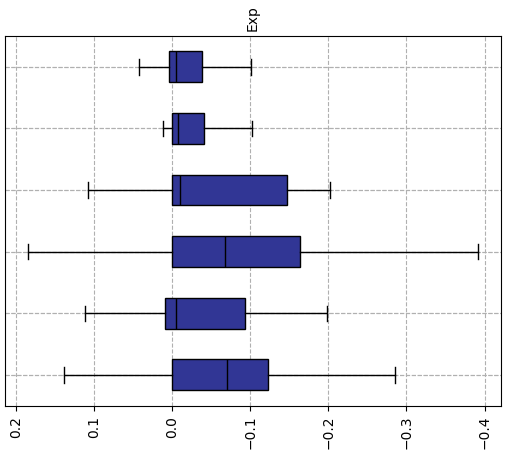

In [15]:
row_ha = pch.HeatmapAnnotation(Exp=pch.anno_boxplot(nodes_df, legend=False, cmap='RdYlBu_r', height=20), plot=True, axis=0,verbose=0)

In [57]:
columns_to_plot = ['Number of nodes', 'Number of edges', 'Connected targets',
       'Perc missing targets', 'Mean degree centrality',
       'Mean closeness centrality', 'Mean betweenness centrality',
       'offtarget_count', 'perc_offtarget',
       'perc_offtarget_nodes', 'perc_offtarget_edges']

# columns_to_plot = [
#        'offtarget_count', 'perc_offtarget',
#        'perc_offtarget_nodes', 'perc_offtarget_edges']


Starting plotting HeatmapAnnotations
Incresing ncol


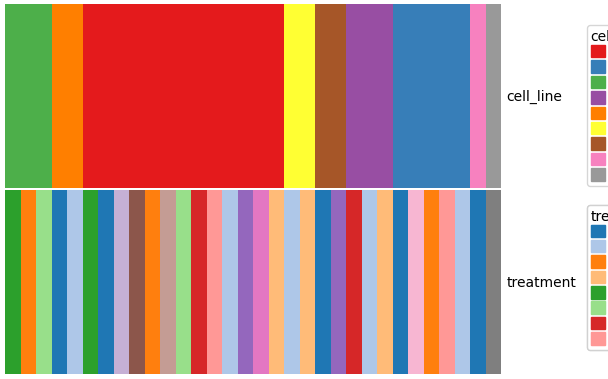

In [51]:

col_ha = pch.HeatmapAnnotation(df=metadata_df,plot=True,legend_gap=5,hgap=0.5,axis=1, legend=True)

Number of nodes
Starting plotting HeatmapAnnotations


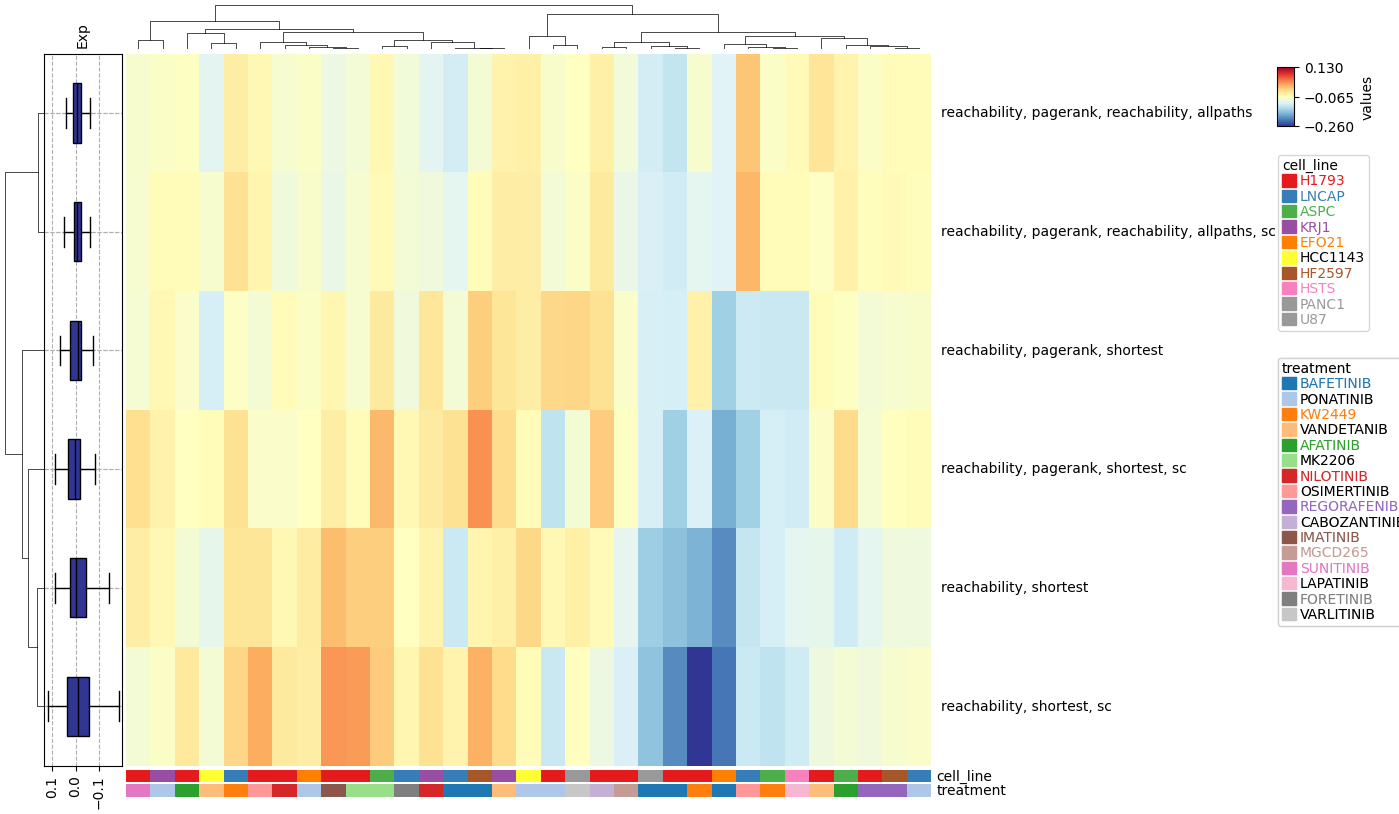

Number of edges
Starting plotting HeatmapAnnotations


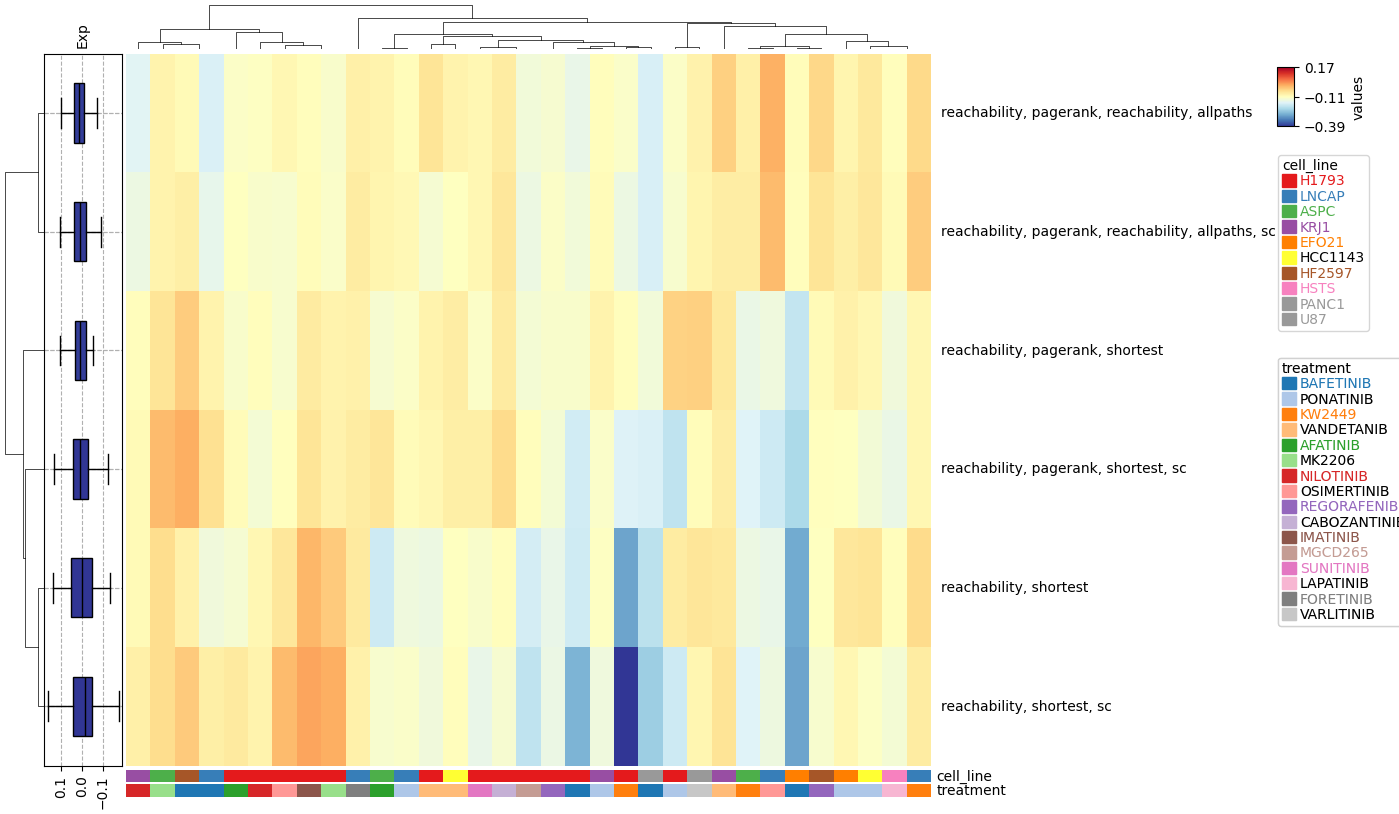

Connected targets
Starting plotting HeatmapAnnotations


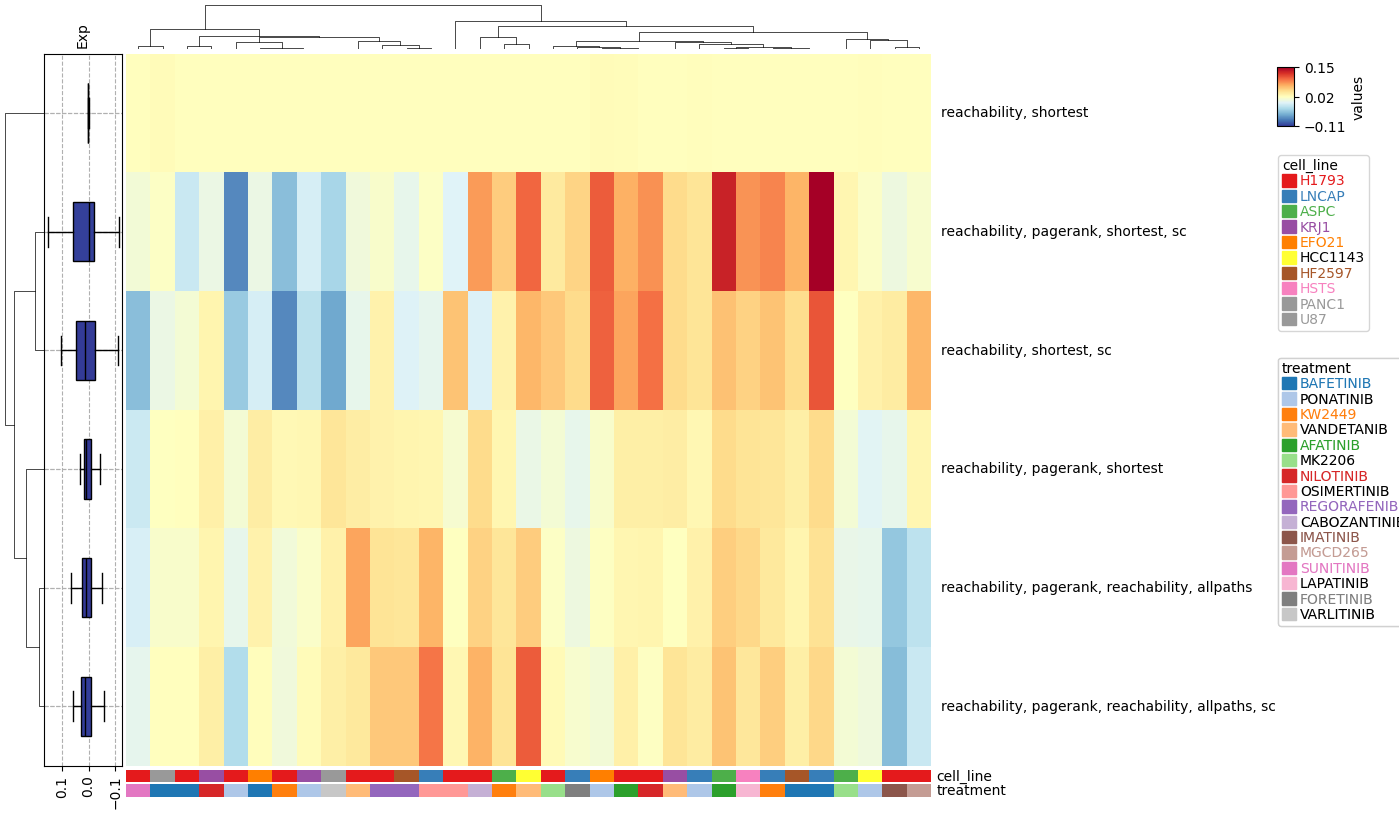

Perc missing targets
Starting plotting HeatmapAnnotations


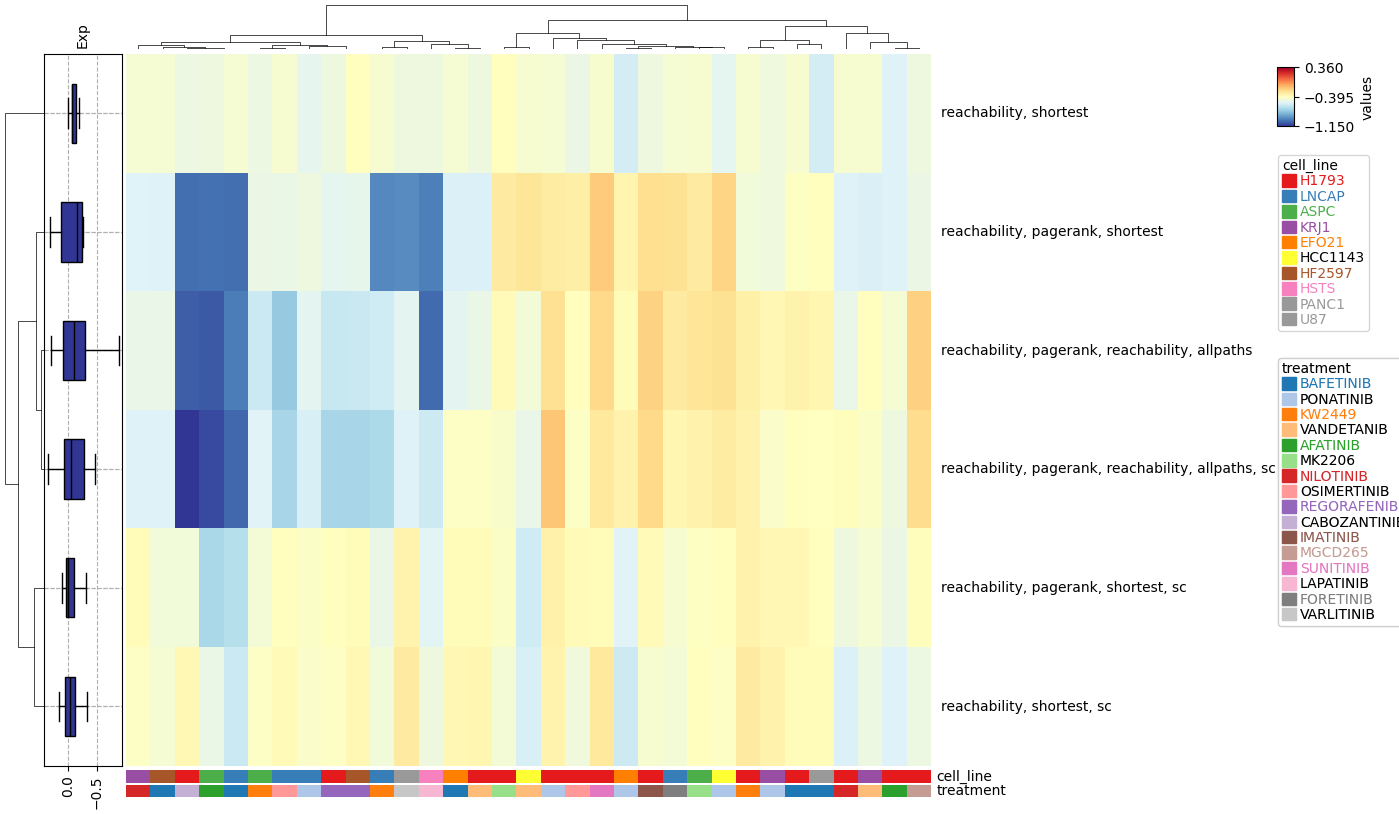

Mean degree centrality
Starting plotting HeatmapAnnotations


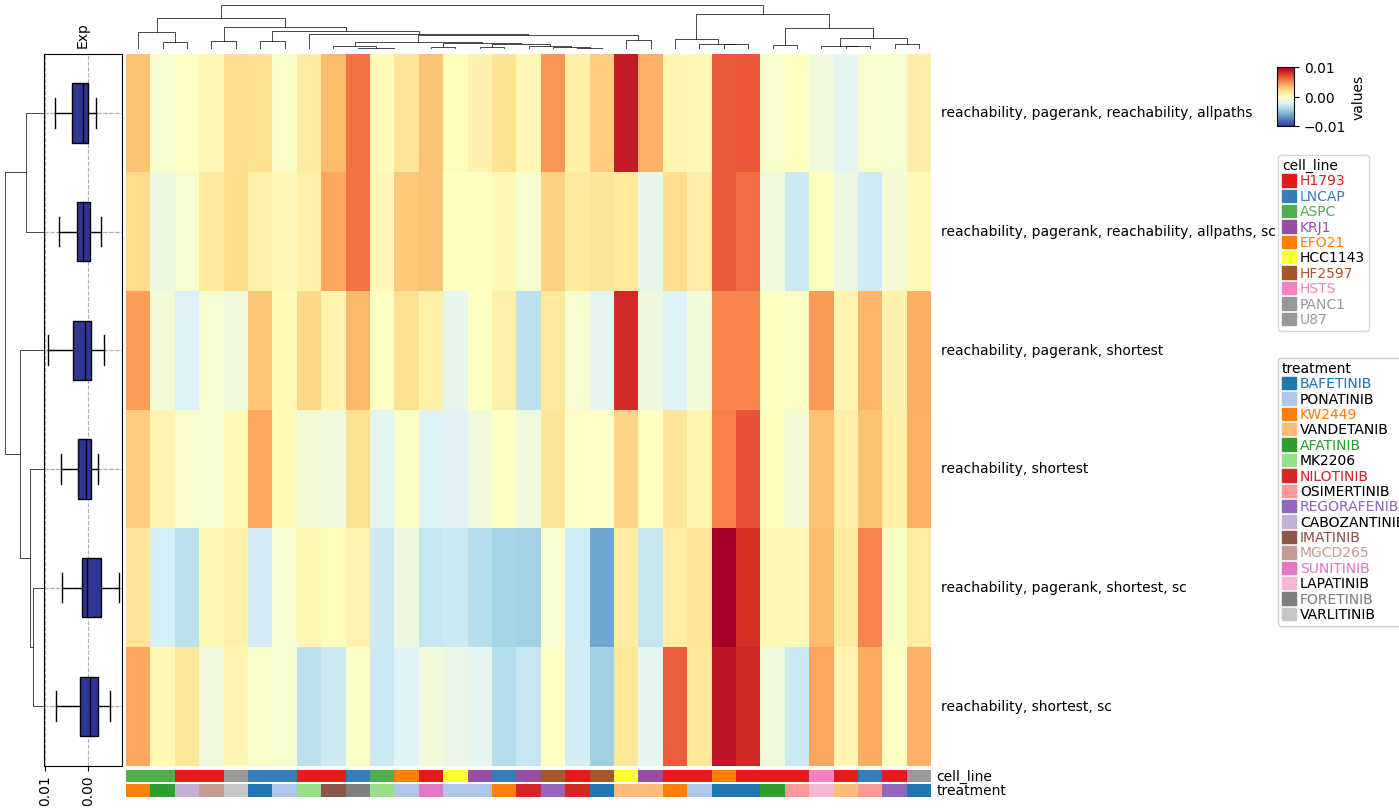

Mean closeness centrality
Starting plotting HeatmapAnnotations


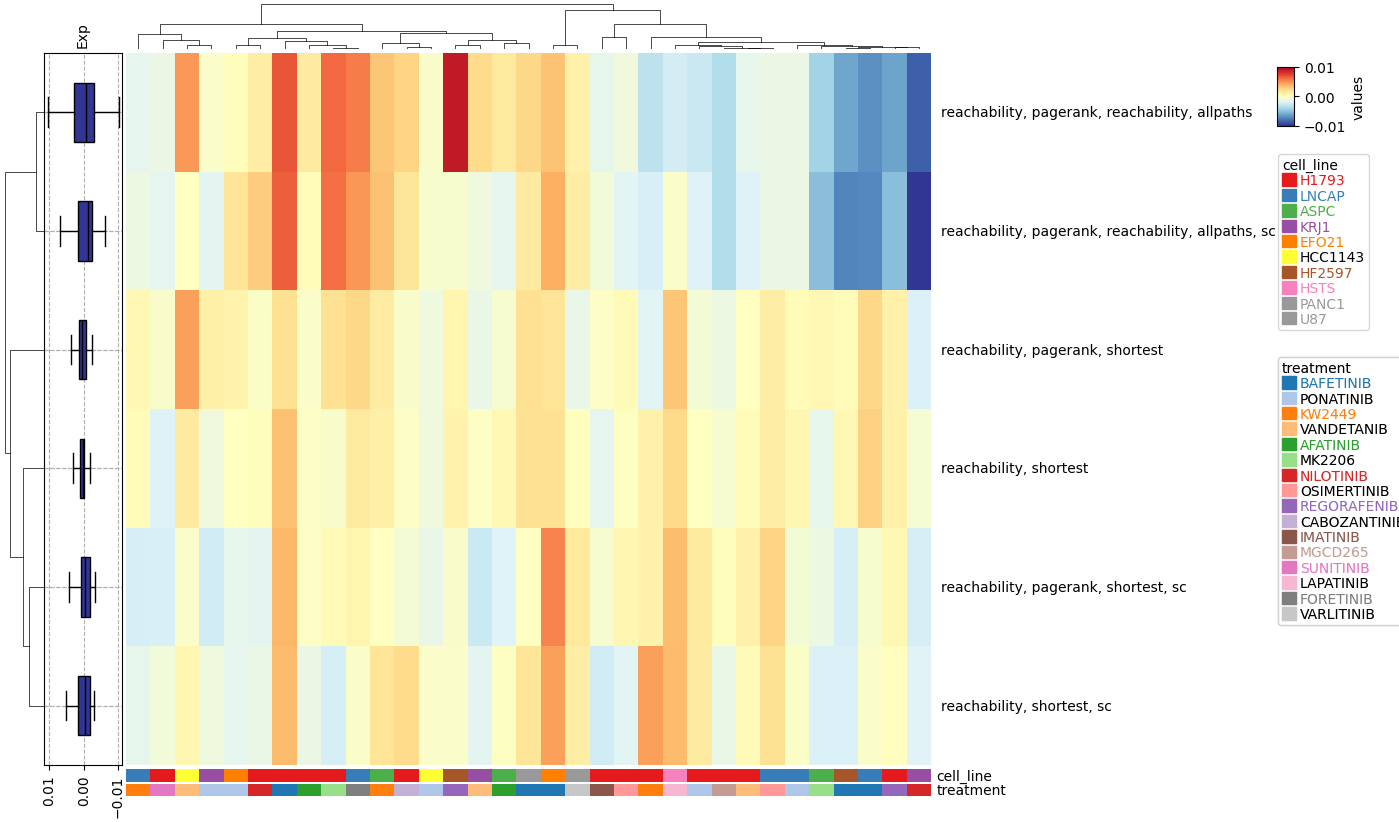

Mean betweenness centrality
Starting plotting HeatmapAnnotations


/home/victo/miniconda3/envs/mthesis/lib/python3.10/site-packages/PyComplexHeatmap/utils.py:514: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cax.set_ylim([vmin, vmax])


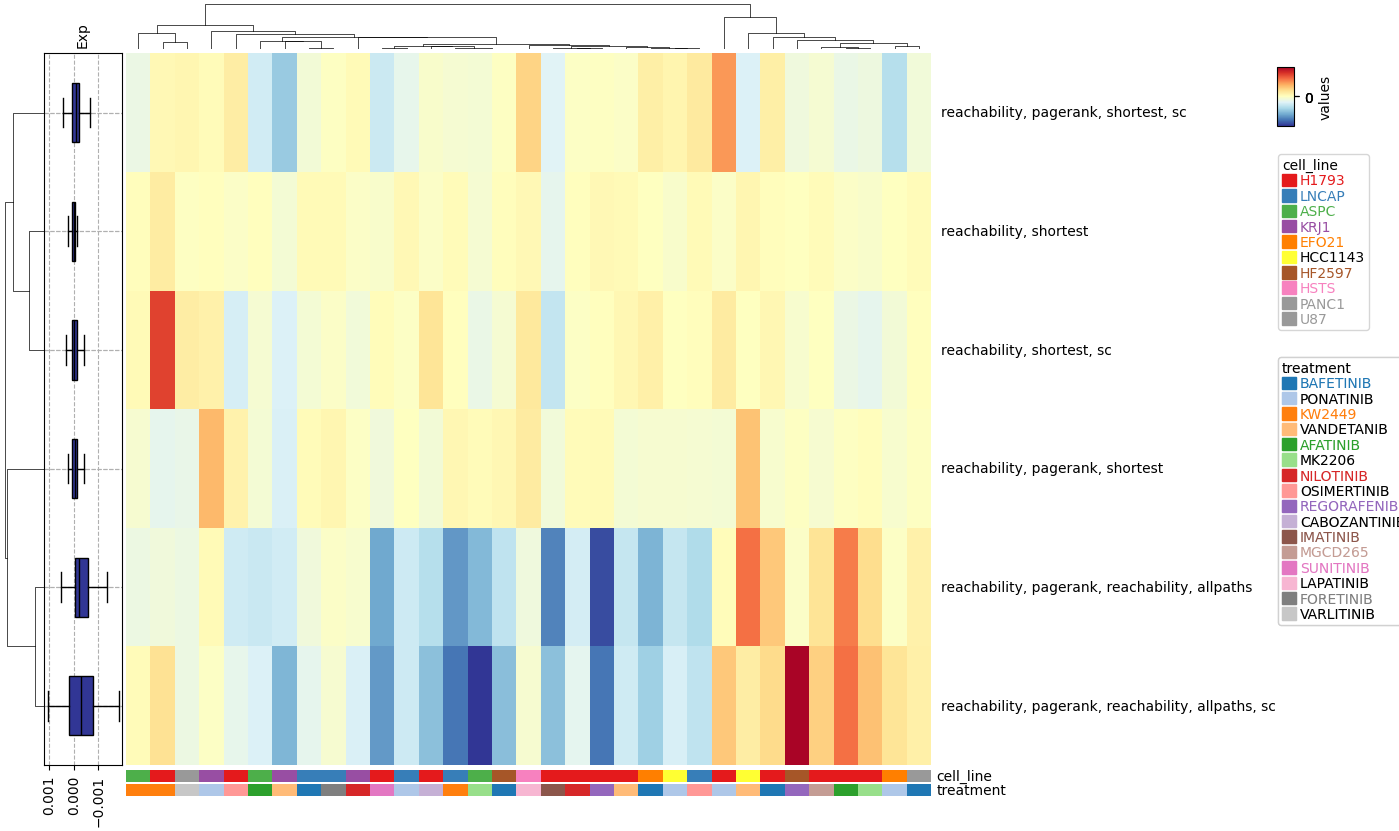

offtarget_count
Starting plotting HeatmapAnnotations


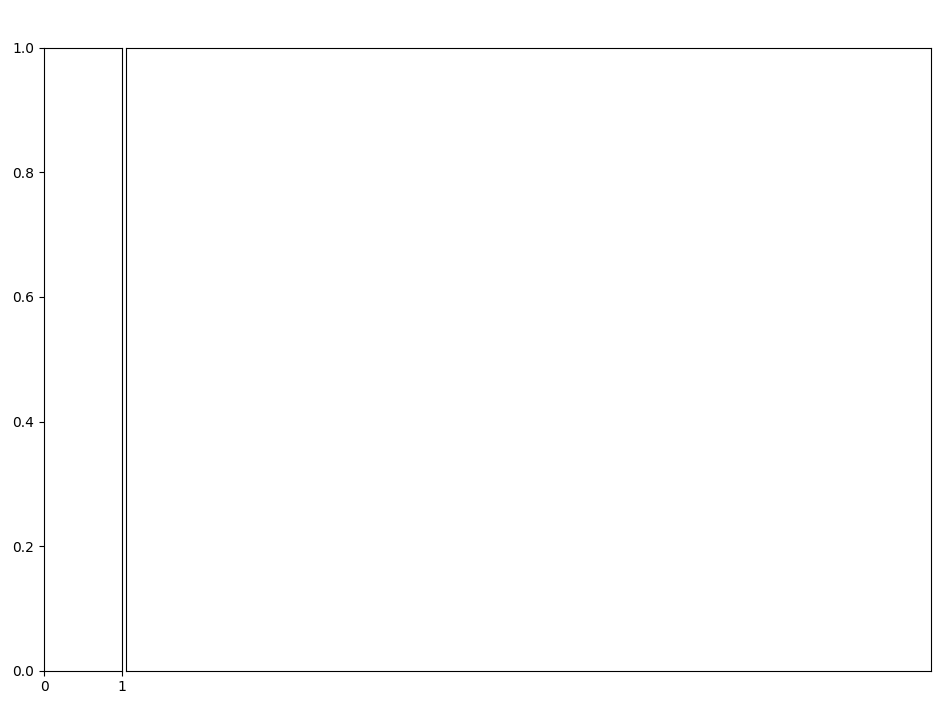

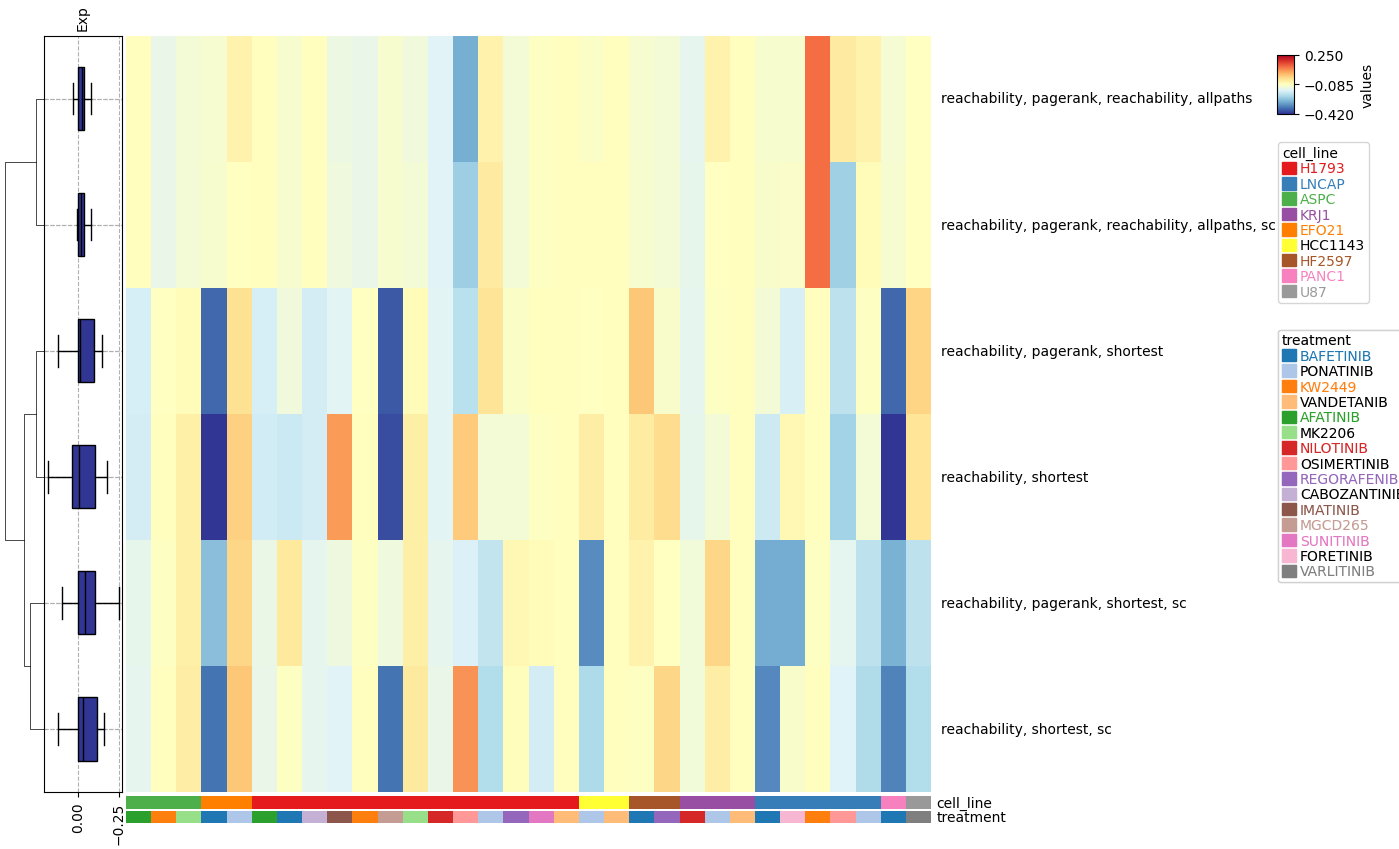

perc_offtarget
Starting plotting HeatmapAnnotations


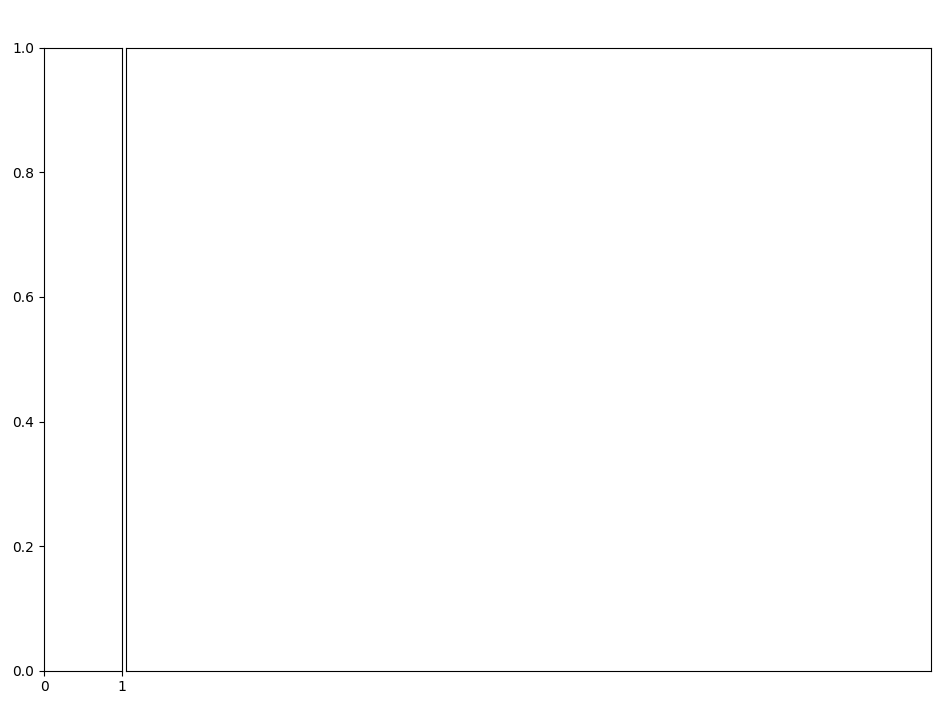

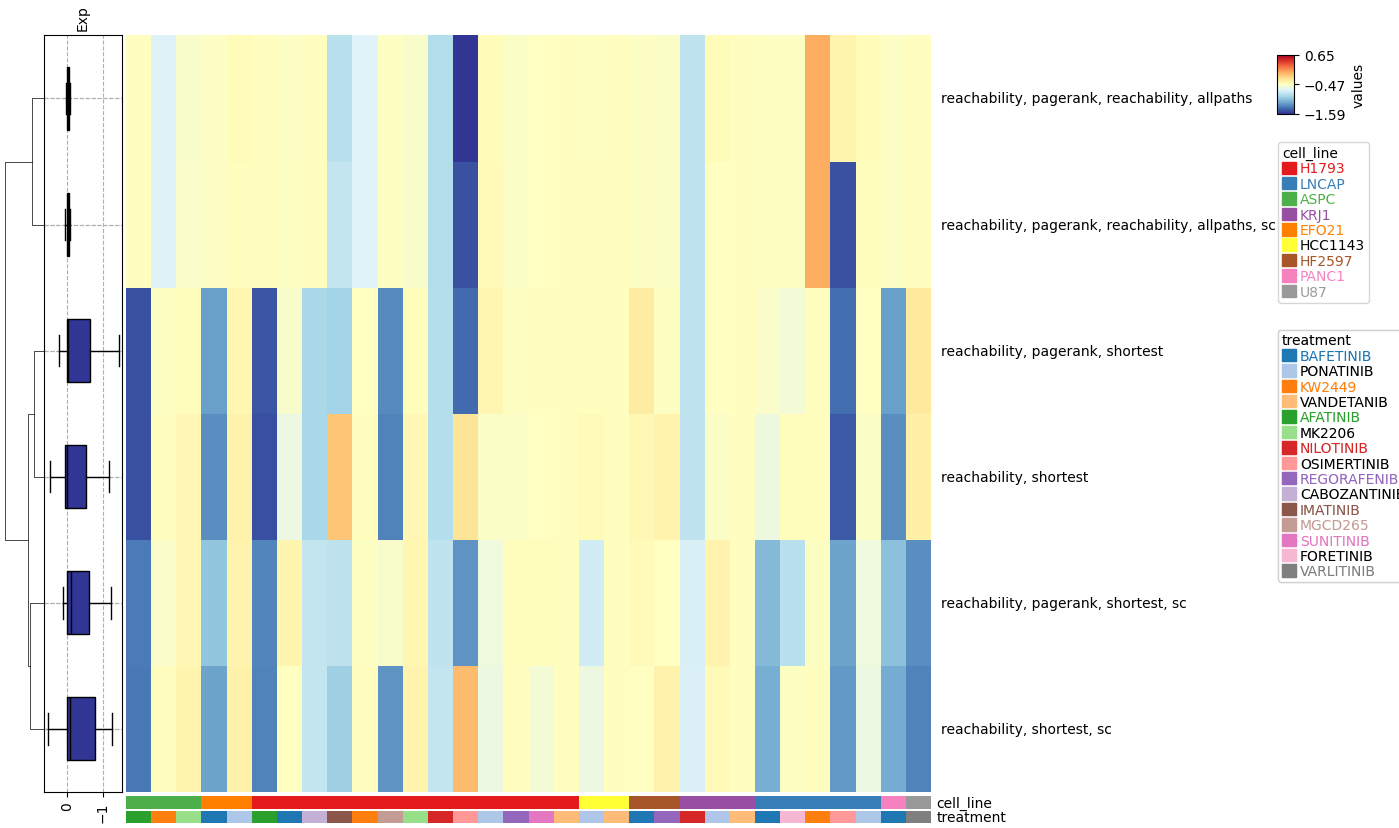

perc_offtarget_nodes
Starting plotting HeatmapAnnotations


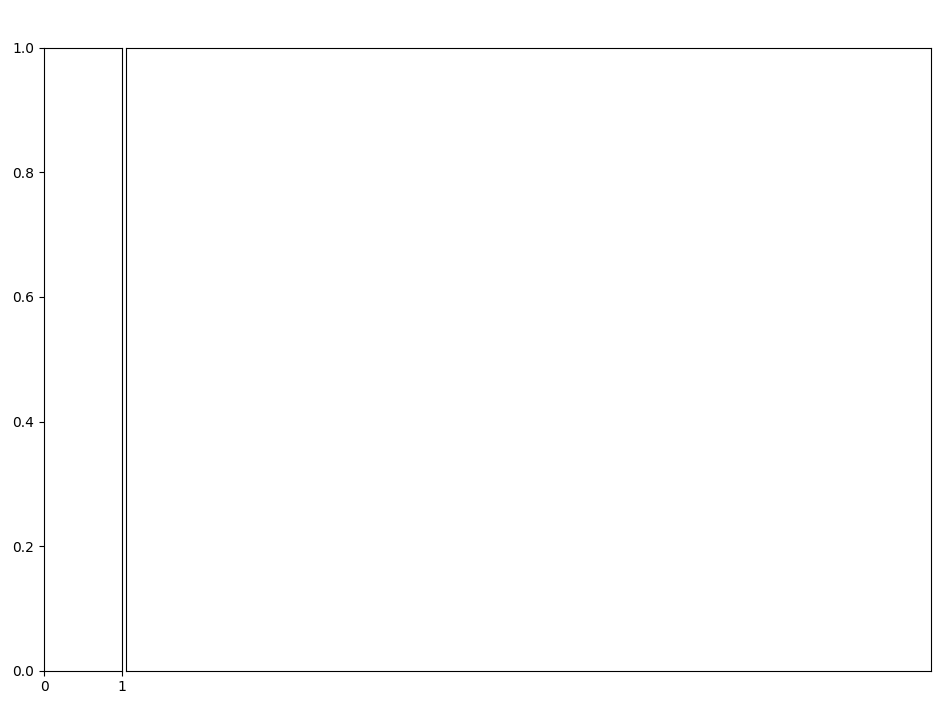

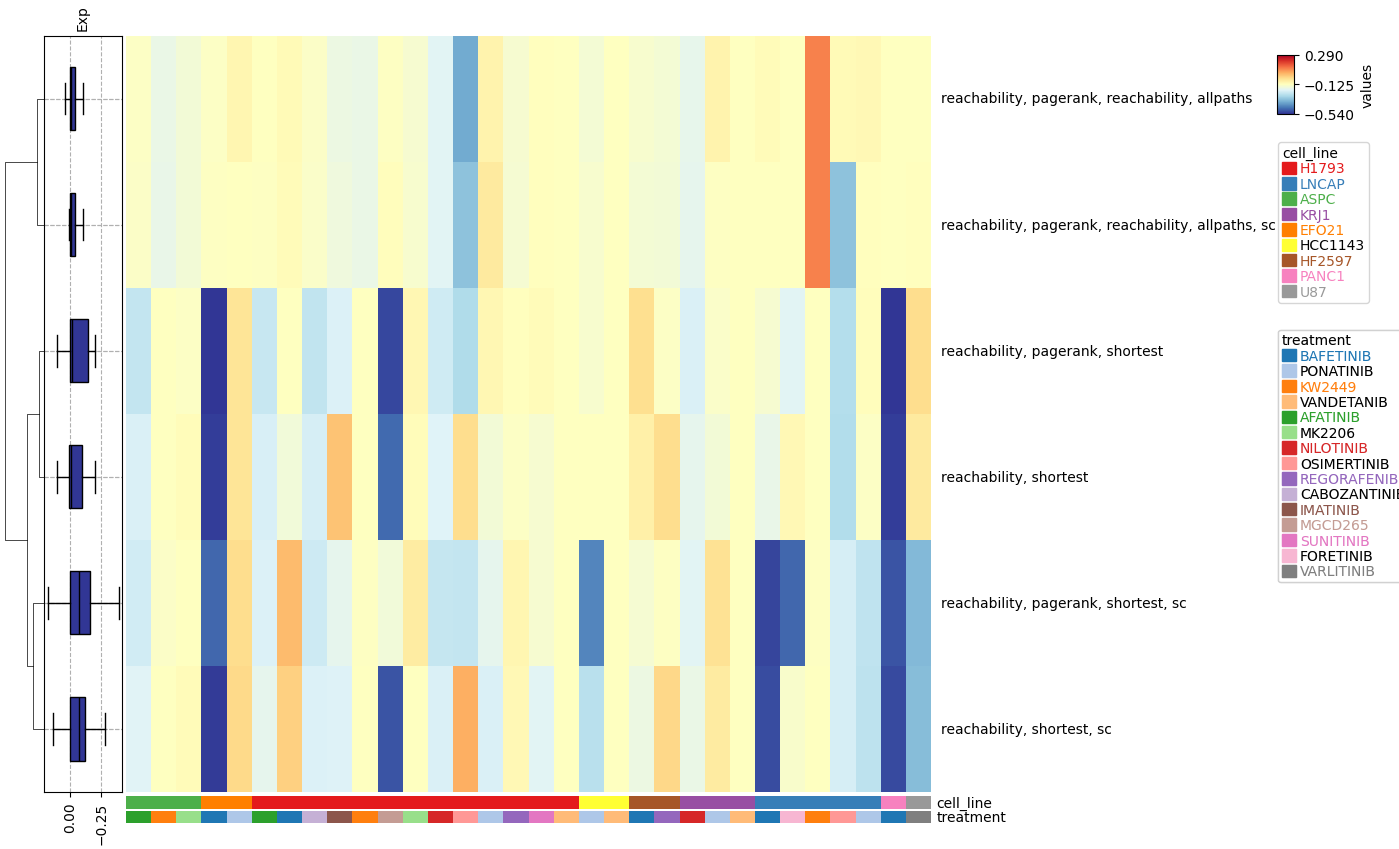

perc_offtarget_edges
Starting plotting HeatmapAnnotations


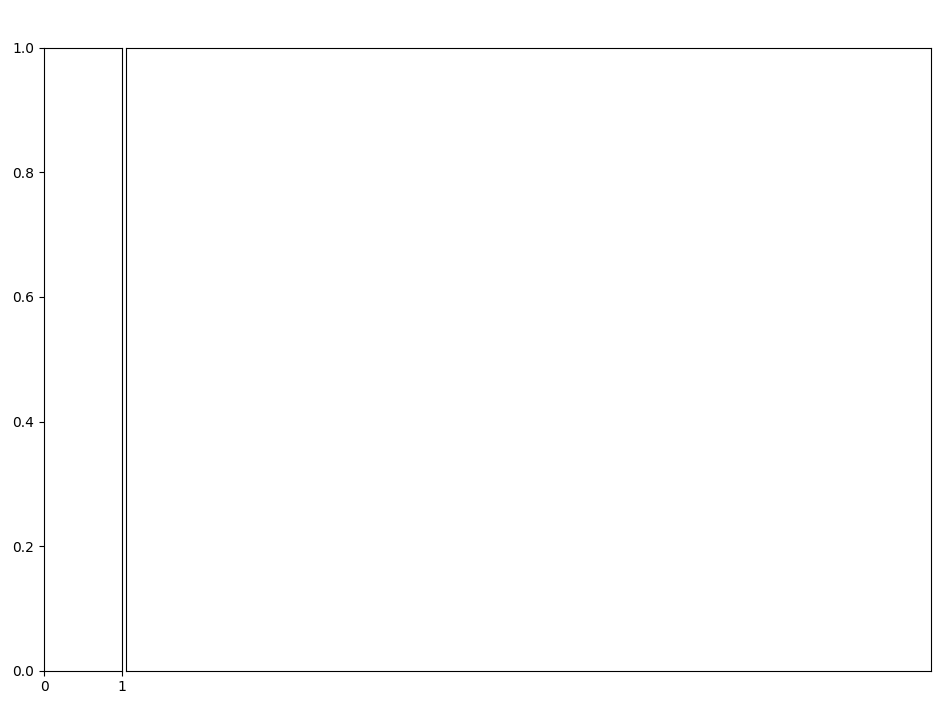

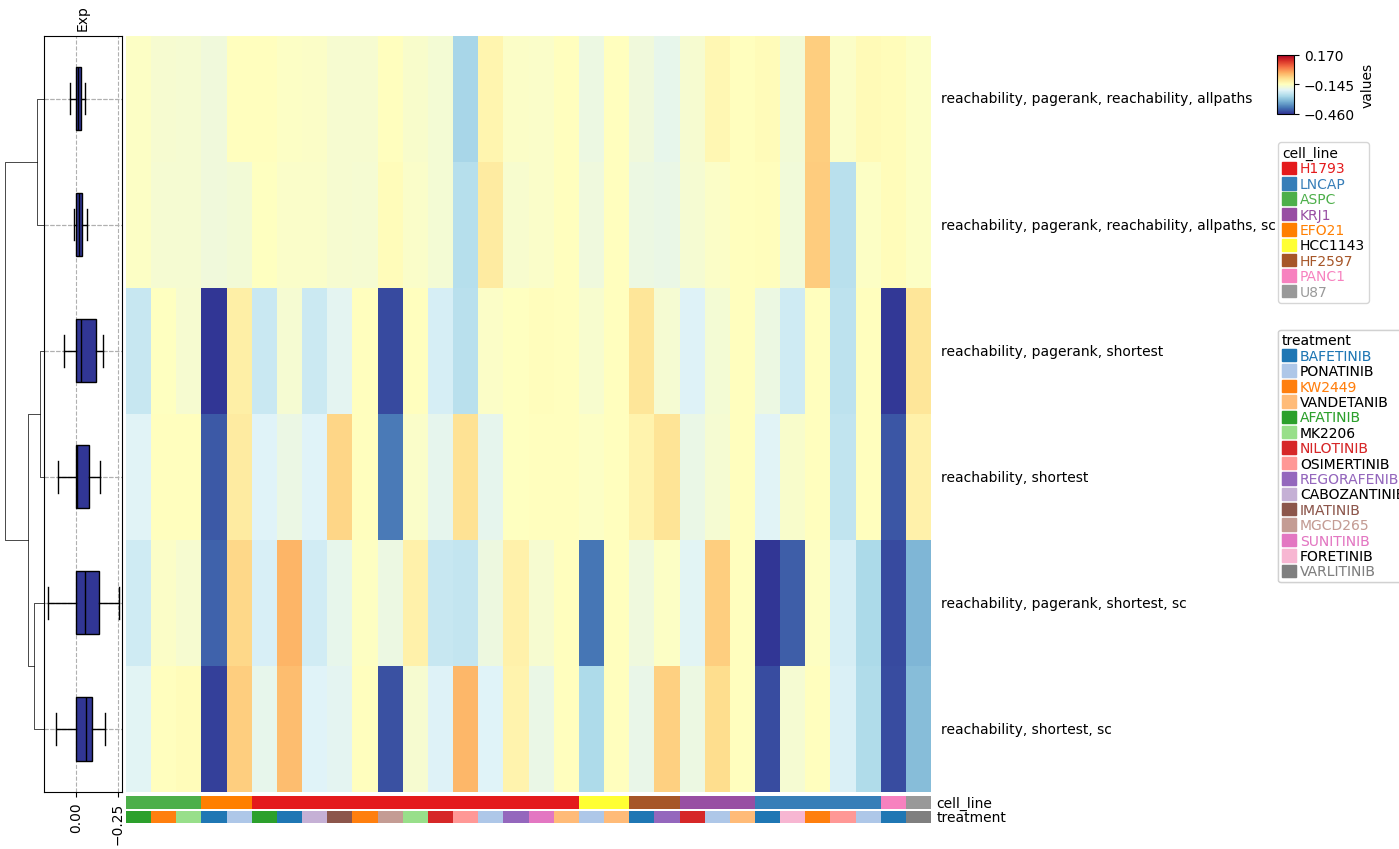

In [66]:
# create heatmap annotation for cell line
for column in columns_to_plot:
    
    print(column)
    nodes_df = graphdata_df_collapsed_log.pivot_table(index='Methods', columns='Biocontext', values=column)
    # generate columns of methods and cell line from the sample column
    metadata_df = pd.DataFrame({'Method_cell_line': nodes_df.columns})
    metadata_df['cell_line'] = metadata_df['Method_cell_line'].apply(lambda x: x.split('_')[0])
    metadata_df['treatment'] = metadata_df['Method_cell_line'].apply(lambda x: x.split('_')[1])
    # move method_cellline to index
    metadata_df.set_index('Method_cell_line', inplace=True)
    # replace na with 0
    nodes_df.fillna(0, inplace=True)
    try:
        plt.figure(figsize=(12, 9))
        col_ha = pch.HeatmapAnnotation(df=metadata_df,plot=False,legend_gap=5,hgap=0.5, axis=1, legend=True)
        row_ha = pch.HeatmapAnnotation(Exp=pch.anno_boxplot(nodes_df, legend=False, cmap='RdYlBu_r', height=20), plot=False, axis=0,verbose=0)
        cm = pch.ClusterMapPlotter(data=nodes_df,
                                    left_annotation=row_ha,
                                    bottom_annotation=col_ha,
                                    col_cluster=True,row_cluster=True,
                                    label='values', row_dendrogram=True,
                                    col_dendrogram=True,
                                    show_rownames=True, show_colnames=True,
                                    tree_kws={'row_cmap': 'Set1'},verbose=0,
                                    legend=True,
                                    center = 0,
                                    cmap='RdYlBu_r',
                                    xticklabels_kws={'labelrotation':-90,'labelcolor':'black'})
        
        plt.show()
    except ValueError:
        plt.figure(figsize=(12, 9))
        col_ha = pch.HeatmapAnnotation(df=metadata_df,plot=False,legend_gap=5,hgap=0.5, axis=1, legend=True)
        row_ha = pch.HeatmapAnnotation(Exp=pch.anno_boxplot(nodes_df, legend=False, cmap='RdYlBu_r', height=20), plot=False, axis=0,verbose=0)
        cm = pch.ClusterMapPlotter(data=nodes_df,
                                   left_annotation=row_ha,
                                    bottom_annotation=col_ha,
                                    col_cluster=False,row_cluster=True,
                                    label='values', row_dendrogram=True,
                                    col_dendrogram=False,
                                    show_rownames=True, show_colnames=False,
                                    tree_kws={'row_cmap': 'Set1'},verbose=0,
                                    legend=True,
                                    center = 0,
                                    cmap='RdYlBu_r',
                                    xticklabels_kws={'labelrotation':-90,'labelcolor':'black'})
        
        plt.show()

### Distance checks

In [4]:
import networkx as nx

In [5]:
G = nx.read_weighted_edgelist('network_collectri.sif', delimiter = '\t', create_using = nx.DiGraph)
for u, v, data in G.edges(data=True):
    weight = data['weight']
    data['sign'] = 1 if weight >= 0 else -1
    data['weight'] = abs(weight)

## Sources (KI targets) formatting
source_df = pd.read_csv('panacea_sources.tsv', sep='\t')

nodes_network = [f for f in G.nodes]
filtered_source_df = source_df[source_df.target.isin(nodes_network)]
filtered_source_df

# create a dictionary per treatment, with the targets as keys and the sign as value
source_dict = {}
for i in range(len(filtered_source_df)):
    treatment = filtered_source_df.iloc[i, 0]
    target = filtered_source_df.iloc[i, 1]
    sign = filtered_source_df.iloc[i, 2]
    if treatment not in source_dict:
        source_dict[treatment] = {}
    source_dict[treatment][target] = float(sign)

## TF formatting
tf_activities = pd.read_csv('tf_activity_results.tsv', sep='\t', index_col=0).transpose()
tfs = list(tf_activities.index)
offtargets_df = pd.read_csv('panacea_offtargets.tsv', sep='\t', index_col=0)
offtargets = offtargets_df.target.tolist()
# remove offtargets that are in the target column of the filtered_source_df
offtargets = set([f for f in offtargets if f not in filtered_source_df.target.tolist()])
sources = set(filtered_source_df.target.tolist())

# Run the solver
selected_targets_dict = {} 

In [6]:
G = nx.read_weighted_edgelist('network_collectri.sif', delimiter = '\t', create_using = nx.DiGraph)
for u, v, data in G.edges(data=True):
    weight = data['weight']
    data['sign'] = 1 if weight >= 0 else -1
    data['weight'] = abs(weight)

In [11]:
treatments = list(source_dict.keys())

In [12]:
# per column, count the rows which have a value different from NaN
tf_activities.count()


ASPC_AFATINIB         266
ASPC_AZD5363          266
ASPC_DOVITINIB        270
ASPC_ICOTINIB         269
ASPC_KW2449           267
ASPC_MK2206           268
EFO21_BAFETINIB       282
EFO21_PONATINIB       282
H1793_AFATINIB        267
H1793_BAFETINIB       267
H1793_BOSUTINIB       267
H1793_CABOZANTINIB    267
H1793_CRIZOTINIB      267
H1793_DASATINIB       267
H1793_GEFITINIB       267
H1793_IMATINIB        268
H1793_KW2449          267
H1793_MGCD265         267
H1793_MK2206          267
H1793_NILOTINIB       267
H1793_OSIMERTINIB     267
H1793_PONATINIB       267
H1793_REGORAFENIB     267
H1793_SORAFENIB       267
H1793_SUNITINIB       267
H1793_VANDETANIB      267
HCC1143_PONATINIB     283
HCC1143_VANDETANIB    283
HF2597_BAFETINIB      277
HF2597_REGORAFENIB    277
HSTS_LAPATINIB        262
KRJ1_BOSUTINIB        264
KRJ1_DASATINIB        264
KRJ1_ICOTINIB         268
KRJ1_NILOTINIB        264
KRJ1_PONATINIB        264
KRJ1_VANDETANIB       266
LNCAP_BAFETINIB       267
LNCAP_DOVITI

In [13]:
tf_activities.columns

Index(['ASPC_AFATINIB', 'ASPC_AZD5363', 'ASPC_DOVITINIB', 'ASPC_ICOTINIB',
       'ASPC_KW2449', 'ASPC_MK2206', 'EFO21_BAFETINIB', 'EFO21_PONATINIB',
       'H1793_AFATINIB', 'H1793_BAFETINIB', 'H1793_BOSUTINIB',
       'H1793_CABOZANTINIB', 'H1793_CRIZOTINIB', 'H1793_DASATINIB',
       'H1793_GEFITINIB', 'H1793_IMATINIB', 'H1793_KW2449', 'H1793_MGCD265',
       'H1793_MK2206', 'H1793_NILOTINIB', 'H1793_OSIMERTINIB',
       'H1793_PONATINIB', 'H1793_REGORAFENIB', 'H1793_SORAFENIB',
       'H1793_SUNITINIB', 'H1793_VANDETANIB', 'HCC1143_PONATINIB',
       'HCC1143_VANDETANIB', 'HF2597_BAFETINIB', 'HF2597_REGORAFENIB',
       'HSTS_LAPATINIB', 'KRJ1_BOSUTINIB', 'KRJ1_DASATINIB', 'KRJ1_ICOTINIB',
       'KRJ1_NILOTINIB', 'KRJ1_PONATINIB', 'KRJ1_VANDETANIB',
       'LNCAP_BAFETINIB', 'LNCAP_DOVITINIB', 'LNCAP_FORETINIB', 'LNCAP_KW2449',
       'LNCAP_OSIMERTINIB', 'LNCAP_PONATINIB', 'LNCAP_SORAFENIB',
       'PANC1_BAFETINIB', 'U87_QUIZARTINIB', 'U87_VARLITINIB'],
      dtype='object')

In [14]:
# create an empty dictionary to store the results
tf_dict = {}

# iterate over the columns of the dataframe
for column in tf_activities.columns:
    # split the column name into celltype and treatment
    celltype, treatment = column.split('_')
    # create a key with an empty list for the treatment if it doesn't exist yet
    if treatment not in tf_dict:
        tf_dict[treatment] = []
    # get the non-nan tfs for this column
    non_nan_tfs = tf_activities[column].dropna().index.tolist()
    # extend the list for the dictionary[treatment] with non-nan tfs
    tf_dict[treatment].extend(non_nan_tfs)



In [15]:
biocontexts = tf_activities.columns.tolist()
biocontexts

['ASPC_AFATINIB',
 'ASPC_AZD5363',
 'ASPC_DOVITINIB',
 'ASPC_ICOTINIB',
 'ASPC_KW2449',
 'ASPC_MK2206',
 'EFO21_BAFETINIB',
 'EFO21_PONATINIB',
 'H1793_AFATINIB',
 'H1793_BAFETINIB',
 'H1793_BOSUTINIB',
 'H1793_CABOZANTINIB',
 'H1793_CRIZOTINIB',
 'H1793_DASATINIB',
 'H1793_GEFITINIB',
 'H1793_IMATINIB',
 'H1793_KW2449',
 'H1793_MGCD265',
 'H1793_MK2206',
 'H1793_NILOTINIB',
 'H1793_OSIMERTINIB',
 'H1793_PONATINIB',
 'H1793_REGORAFENIB',
 'H1793_SORAFENIB',
 'H1793_SUNITINIB',
 'H1793_VANDETANIB',
 'HCC1143_PONATINIB',
 'HCC1143_VANDETANIB',
 'HF2597_BAFETINIB',
 'HF2597_REGORAFENIB',
 'HSTS_LAPATINIB',
 'KRJ1_BOSUTINIB',
 'KRJ1_DASATINIB',
 'KRJ1_ICOTINIB',
 'KRJ1_NILOTINIB',
 'KRJ1_PONATINIB',
 'KRJ1_VANDETANIB',
 'LNCAP_BAFETINIB',
 'LNCAP_DOVITINIB',
 'LNCAP_FORETINIB',
 'LNCAP_KW2449',
 'LNCAP_OSIMERTINIB',
 'LNCAP_PONATINIB',
 'LNCAP_SORAFENIB',
 'PANC1_BAFETINIB',
 'U87_QUIZARTINIB',
 'U87_VARLITINIB']

In [16]:

tf_dict = {}
for biocontext in biocontexts:
    celltype, treatment = biocontext.split('_')
    try:
        filename = f'./results/PANACEA_real_{biocontext}_selectedtargets.csv'
        # convert df to dictionary and append to target dict
        df = pd.read_csv(filename, index_col=0)
        if treatment not in tf_dict:
            tf_dict[treatment] = []
        
        targets = df.index.tolist()
        tf_dict[treatment].extend(targets)
        
    except FileNotFoundError:
        pass

# delete duplicate elements in the dict
tf_dict = {k:list(set(v)) for k,v in tf_dict.items()}

In [25]:
import numpy as np

In [26]:
treatments = tf_dict.keys()
offtargets_dict = {}
# keep drugs present in the source_dict and tf_dict and offtargets_df
treatments = [f for f in treatments if f in source_dict and f in tf_dict and f in offtargets_df.index]
for treatment in treatments:
    source = list(source_dict[treatment].keys())[0]
    offtargets = offtargets_df.loc[[treatment]].target.tolist()
    tfs = tf_dict[treatment]
    reachable_nodes = set(source_dict.keys())
    reachable_nodes.update(nx.descendants(G, source))
    # remove the tfs that are not reachable for a given treatment, update the tf_dict
    tf_dict[treatment] = set([f for f in tfs if f in reachable_nodes])
    # create an offtarget dict that includes only the nodes that are reachable for a given treatment
    offtargets_dict[treatment] = set([f for f in offtargets if f in reachable_nodes])
    print(offtargets_dict[treatment])



{'EGFR'}
set()
set()
{'FLT3', 'MARK4', 'AURKA', 'AAK1', 'AURKB', 'MAP4K4', 'PAK2', 'RET'}
{'AKT2', 'AKT1'}
{'MAPKAPK2', 'DDR2', 'ABL1', 'LCK', 'BCR', 'ABL2', 'MAPKAPK3', 'LYN', 'EPHA2'}
{'IRAK1', 'MAP4K4', 'RET', 'CSK', 'MAPKAPK2', 'DDR2', 'RIPK2', 'MAP3K1', 'ABL2', 'HCK', 'EPHA2', 'MAP4K2', 'FYN', 'BCR', 'MYLK', 'YES1', 'PTK2B', 'LYN', 'EPHB3', 'MAPK14', 'FLT3', 'ABL1', 'LCK', 'SRC'}
set()
{'FLT3', 'DDR2', 'RIPK2', 'BCR', 'EPHA2', 'RET'}
set()
set()
set()
{'ABL2', 'BCR', 'ABL1'}
{'FLT3', 'ABL1', 'LCK', 'MET', 'SRC', 'BCR', 'ABL2', 'HCK', 'LYN'}
{'DDR2', 'ABL1', 'BCR', 'ABL2', 'EPHA2'}
{'EGFR', 'TEC'}
{'FLT3', 'MAPKAPK2', 'LIMK1', 'ABL1', 'DDR2', 'RET', 'RIPK2', 'MAP3K1', 'BCR', 'MAPK14'}
{'PDGFRB', 'FLT3', 'LATS1', 'AAK1', 'MAP4K1', 'MAP4K4', 'YES1', 'RPS6KA4', 'JAK1', 'RET'}
{'RIPK2', 'RET'}
{'MAP2K5', 'RET', 'MST1R', 'DDR2', 'RIPK2', 'EPHB4', 'ABL2', 'HCK', 'EPHA2', 'MAP4K5', 'BCR', 'AURKB', 'PTK2B', 'LYN', 'BTK', 'FLT3', 'ABL1', 'NTRK1', 'LCK', 'MET', 'SRC', 'EPHB6'}
set()
{'EGFR',

In [27]:
# compute distances from source to tfs, and from source to offtargets
treatments = tf_dict.keys()
offtargets_dict = {}
# keep drugs present in the source_dict and tf_dict and offtargets_df
treatments = [f for f in treatments if f in source_dict and f in tf_dict and f in offtargets_df.index]
for treatment in treatments:
    source = list(source_dict[treatment].keys())[0]
    offtargets = offtargets_df.loc[[treatment]].target.tolist()
    tfs = tf_dict[treatment]
    reachable_nodes = set(source_dict.keys())
    reachable_nodes.update(nx.descendants(G, source))
    # remove the tfs that are not reachable for a given treatment, update the tf_dict
    tf_dict[treatment] = set([f for f in tfs if f in reachable_nodes])
    # create an offtarget dict that includes only the nodes that are reachable for a given treatment
    offtargets_dict[treatment] = set([f for f in offtargets if f in reachable_nodes])
    print(offtargets_dict[treatment])

avg_distance_source_offtargets = []
avg_distance_source_tfs = []
avg_distance_tfs_offt = []

avg_distance_offtargets_source = []
avg_distance_tfs_source = []
avg_distance_offt_tfs = []

len_reachable_offtargets = []
len_tfs = []
len_initial_offtargets = []
for treatment in treatments:
    initial_offtargets = offtargets_df.loc[[treatment]].target.tolist()
    source = list(source_dict[treatment].keys())[0]
    offtargets = list(offtargets_dict[treatment])
    tfs = list(tf_dict[treatment])
    distances_source_offtargets = []
    distances_source_tfs = []
    distances_tfs_offt = []
    
    distances_offtargets_source = []
    distances_tfs_source = []
    distances_offt_tfs = []
    try:
        for offtarget in offtargets:
            distances_source_offtargets += [nx.shortest_path_length(G, source=source, target=offtarget)]
        avg_distance_source_offtargets += [sum(distances_source_offtargets) / len(distances_source_offtargets)]
    except ZeroDivisionError:
        avg_distance_source_offtargets += [np.nan]
    try:
        for tf in tfs:
            distances_source_tfs += [nx.shortest_path_length(G, source=source, target=tf)]
        avg_distance_source_tfs+= [sum(distances_source_tfs) / len(distances_source_tfs)]
    except ZeroDivisionError:
        avg_distance_source_tfs += [np.nan]

    try:
        for tf in tfs:
            for offtarget in offtargets:
                try:
                    distances_offt_tfs += [nx.shortest_path_length(G, source=offtarget, target=tf)]
                except nx.NetworkXNoPath:
                    pass
        avg_distance_offt_tfs += [sum(distances_offt_tfs) / len(distances_offt_tfs)]
    except ZeroDivisionError:
        avg_distance_offt_tfs += [np.nan]

    # reverse the network G
    G_reversed = G.reverse()
    
    try:
        for offtarget in offtargets:
            try:
                distances_offtargets_source += [nx.shortest_path_length(G_reversed, source=source, target=offtarget)]
            except nx.NetworkXNoPath:
                pass
        avg_distance_offtargets_source += [sum(distances_offtargets_source) / len(distances_offtargets_source)]
    except ZeroDivisionError:
        avg_distance_offtargets_source += [np.nan]
    try:
        for tf in tfs:
            try:
                distances_tfs_source += [nx.shortest_path_length(G_reversed, source=source, target=tf)]
            except nx.NetworkXNoPath:
                pass
        avg_distance_tfs_source+= [sum(distances_tfs_source) / len(distances_tfs_source)]
    except ZeroDivisionError:
        avg_distance_tfs_source += [np.nan]

    try:
        for tf in tfs:
            for offtarget in offtargets:
                try:
                    distances_tfs_offt += [nx.shortest_path_length(G_reversed, source=offtarget, target=tf)]
                except nx.NetworkXNoPath:
                    pass
        avg_distance_tfs_offt += [sum(distances_tfs_offt) / len(distances_tfs_offt)]
    except ZeroDivisionError:
        avg_distance_tfs_offt += [np.nan]
    
    # compute the average distance from source to tfs and from source to offtargets
    len_reachable_offtargets += [len(distances_source_offtargets)]
    len_tfs += [len(distances_source_tfs)]
    len_initial_offtargets += [len(initial_offtargets)]

    # save this in a new dataframe with the columns treatment, avg_distance_source_offtargets, avg_distance_source_tfs
distance_df = pd.DataFrame({'treatment': treatments, 
                            'avg_distance_source_offtargets': avg_distance_source_offtargets, 
                            'avg_distance_offtargets_source': avg_distance_offtargets_source,
                            'avg_distance_source_tfs': avg_distance_source_tfs,
                            'avg_distance_tfs_source': avg_distance_tfs_source,
                            'avg_distance_offt_tfs': avg_distance_offt_tfs,
                            'avg_distance_tfs_offt': avg_distance_tfs_offt,
                            'len_offtargets': len_reachable_offtargets,
                            'len_initial_offtargets': len_initial_offtargets,
                            'len_tfs': len_tfs})


# compute the average

{'EGFR'}
set()
set()
{'FLT3', 'MARK4', 'AURKA', 'AAK1', 'AURKB', 'MAP4K4', 'PAK2', 'RET'}
{'AKT2', 'AKT1'}
{'MAPKAPK2', 'DDR2', 'ABL1', 'LCK', 'BCR', 'ABL2', 'MAPKAPK3', 'LYN', 'EPHA2'}
{'IRAK1', 'MAP4K4', 'RET', 'CSK', 'MAPKAPK2', 'DDR2', 'RIPK2', 'MAP3K1', 'ABL2', 'HCK', 'EPHA2', 'MAP4K2', 'FYN', 'BCR', 'MYLK', 'YES1', 'PTK2B', 'LYN', 'EPHB3', 'MAPK14', 'FLT3', 'ABL1', 'LCK', 'SRC'}
set()
{'FLT3', 'DDR2', 'RIPK2', 'BCR', 'EPHA2', 'RET'}
set()
set()
set()
{'ABL2', 'BCR', 'ABL1'}
{'FLT3', 'ABL1', 'LCK', 'MET', 'SRC', 'BCR', 'ABL2', 'HCK', 'LYN'}
{'DDR2', 'ABL1', 'BCR', 'ABL2', 'EPHA2'}
{'EGFR', 'TEC'}
{'FLT3', 'MAPKAPK2', 'LIMK1', 'ABL1', 'DDR2', 'RET', 'RIPK2', 'MAP3K1', 'BCR', 'MAPK14'}
{'PDGFRB', 'FLT3', 'LATS1', 'AAK1', 'MAP4K1', 'MAP4K4', 'YES1', 'RPS6KA4', 'JAK1', 'RET'}
{'RIPK2', 'RET'}
{'MAP2K5', 'RET', 'MST1R', 'DDR2', 'RIPK2', 'EPHB4', 'ABL2', 'HCK', 'EPHA2', 'MAP4K5', 'BCR', 'AURKB', 'PTK2B', 'LYN', 'BTK', 'FLT3', 'ABL1', 'NTRK1', 'LCK', 'MET', 'SRC', 'EPHB6'}
set()
{'EGFR',

In [28]:
{'treatment': len(treatments), 
                            'avg_distance_source_offtargets': len(avg_distance_source_offtargets), 
                            'avg_distance_offtargets_source': len(avg_distance_offtargets_source),
                            'avg_distance_source_tfs': len(avg_distance_source_tfs),
                            'avg_distance_tfs_source': len(avg_distance_tfs_source),
                            'avg_distance_offt_tfs': len(avg_distance_offt_tfs),
                            'avg_distance_tfs_offt': len(avg_distance_tfs_offt),
                            'len_offtargets': len(len_reachable_offtargets),
                            'len_initial_offtargets': len(len_initial_offtargets),
                            'len_tfs': len(len_tfs)}


{'treatment': 22,
 'avg_distance_source_offtargets': 22,
 'avg_distance_offtargets_source': 22,
 'avg_distance_source_tfs': 22,
 'avg_distance_tfs_source': 22,
 'avg_distance_offt_tfs': 22,
 'avg_distance_tfs_offt': 22,
 'len_offtargets': 22,
 'len_initial_offtargets': 22,
 'len_tfs': 22}

/home/victo/miniconda3/envs/mthesis/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


(0.0, 8.0)

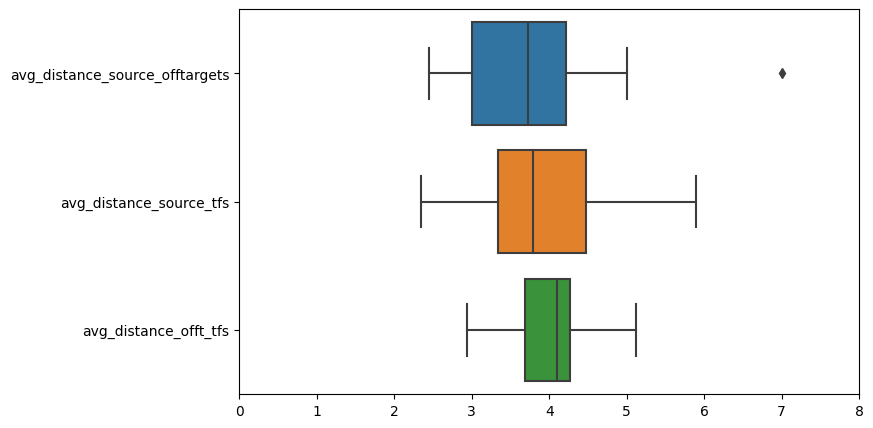

In [30]:
#compute a boxplot with the reachable offtargets and tfs distances

plt.figure(figsize=(8, 5))
# plot one boxplot with a boxplot for avg_distance_source_offtargets and one for avg_distance_source_tfs
sns.boxplot(data=distance_df[['avg_distance_source_offtargets', 'avg_distance_source_tfs', 'avg_distance_offt_tfs']], orient='h')
plt.xlim(0, 8)

/home/victo/miniconda3/envs/mthesis/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<Axes: >

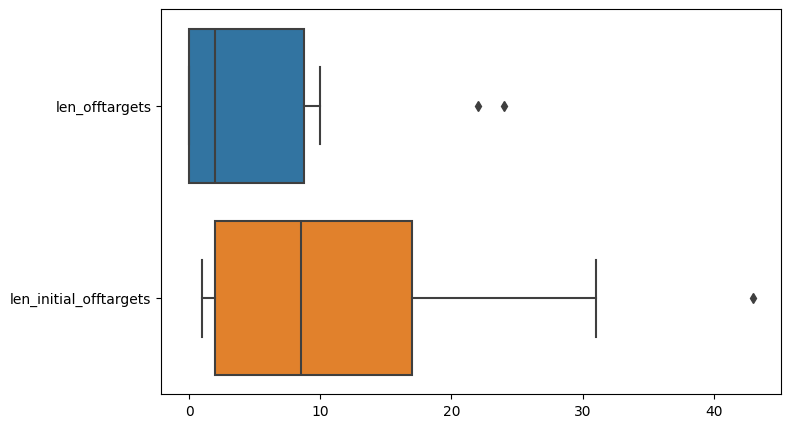

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=distance_df[['len_offtargets', 'len_initial_offtargets']], orient='h')